<a href="https://colab.research.google.com/github/FeViggiano/Projetos_python/blob/main/Oficial_FernandoCardoso_JoaoPedro_KayoKawam_Projeto_P2_PCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alunos: Fernando Cardoso Viggiano, João Pedro e Kayo Kawam

Professor: Carlos Menezes

Atividade Projeto P2 - PCI

In [ ]:
!wget https://github.com/cedmenezes/estudos/raw/main/PCI_Anonimizados.zip
!unzip PCI_Anonimizados.zip
!cd Anonimizados

--2023-12-01 05:11:25--  https://github.com/cedmenezes/estudos/raw/main/PCI_Anonimizados.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cedmenezes/estudos/main/PCI_Anonimizados.zip [following]
--2023-12-01 05:11:25--  https://raw.githubusercontent.com/cedmenezes/estudos/main/PCI_Anonimizados.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1058025 (1.0M) [application/zip]
Saving to: ‘PCI_Anonimizados.zip.3’

PCI_Anonimizados.zi 100%[===================>]   1.01M  --.-KB/s    in 0.07s   

2023-12-01 05:11:26 (14.1 MB/s) - ‘PCI_Anonimizados.zip.3’ saved [1058025/1058025]

Archive:  PCI_Ano

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Projeto de análise e construção de modelos preditivos com a base PCI**

Este projeto valerá pela P2. Será desenvolvido **PRESENCIALMENTE**, em grupo, com avaliações semanais.

Siga os passos abaixo e discuta seus resultados com o professor:

- Carregue um dos arquivos (planilha) e faça um estudo preliminar para conhecer as *features* e os dados.
- Agrupe os arquivos: discentes, docentes.
- É possível fazer observações de evolução temporal? Observe que as planilhas são avaliações realizadas ao fim de cada semestre.
- Proponha perguntas para a base. O que seria interessante saber? O que conseguiríamos prever?


Alunos: Fernando Cardoso, João Pedro e Kayo Kawam


    

In [ ]:
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Entendendo a pesquisa e os tratamentos possíveis

In [ ]:
df1= pd.read_excel('/content/Anonimizados/Pesquisa de Percepção sobre o PCI – Cesu Discentes - 1s2022.xlsx')


#Sobre o que se trata Cada pergunta do questionário:



Perguntas 4 a 7: Dados de identificação do estudante

Perguntas 9 a 13: Avaliação do nível do estudante

Perguntas 13 e 14: Relação entre experiência e desempenho acadêmico

Perguntas 17, 26, 28, 35: Interação com indivíduos estrangeiros

Perguntas 16, 25, 27, 34: Interação no contexto brasileiro

Perguntas 17 a 21: Inquirição sobre a organização do Programa de Ciência da Informação (PCI)

Perguntas 22 a 23: Avaliação do desempenho do professor

Pergunta 24: Autoavaliação do estudante

Pergunta 27: Aspectos relacionados à comunicação









In [ ]:
#Verificando as primeiras informações
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 43 columns):
 #   Column                                                                                                                                                          Non-Null Count  Dtype         
---  ------                                                                                                                                                          --------------  -----         
 0   ID                                                                                                                                                              902 non-null    int64         
 1   Start time                                                                                                                                                      902 non-null    datetime64[ns]
 2   Completion time                                                                                           

In [ ]:
# Tirar umas coluninhas
df1.drop(['O seu projeto de PCI ocorreu em qual Fatec e com qual instituição estrangeira?2'], axis =1, inplace = True)
df1.drop(['O seu projeto de PCI ocorreu em qual Fatec e com qual instituição estrangeira?3'], axis =1, inplace = True)
df1.drop(['Explique sua resposta à questão anterior.2'], axis =1, inplace = True)

In [ ]:
#verificando a base
i=0
for coluna in df1.columns:
  i= i+1
  print(' ----------------- ')
  print(' ')
  print('pergunta'+str(i))
  print(coluna)
  print(df1[coluna].value_counts())


 ----------------- 
 
pergunta1
ID
129    2
1      1
593    1
595    1
596    1
      ..
305    1
306    1
307    1
308    1
901    1
Name: ID, Length: 901, dtype: int64
 ----------------- 
 
pergunta2
Start time
2022-05-23 12:25:46    2
2022-05-25 16:51:45    2
2022-05-20 16:03:30    1
2022-06-22 14:53:13    1
2022-06-22 13:59:11    1
                      ..
2022-06-06 12:17:52    1
2022-06-06 12:20:46    1
2022-06-06 12:24:04    1
2022-06-06 12:22:11    1
2022-09-26 14:02:20    1
Name: Start time, Length: 900, dtype: int64
 ----------------- 
 
pergunta3
Completion time
2022-06-21 13:51:49    2
2022-05-25 17:05:48    2
2022-05-20 16:08:50    1
2022-06-22 12:05:42    1
2022-06-22 14:05:02    1
                      ..
2022-06-03 20:49:25    1
2022-06-05 10:54:43    1
2022-06-06 12:23:34    1
2022-06-06 12:28:04    1
2022-09-26 14:10:12    1
Name: Completion time, Length: 900, dtype: int64
 ----------------- 
 
pergunta4
O seu projeto de PCI ocorreu em qual Fatec e com qual instituiçã

In [ ]:
#simplificando as colunas
count = 1
for coluna in df1.columns:
    df1.rename(columns={coluna: 'pergunta'+ str(count)}, inplace=True)
    count = count +1



##Categorização

In [ ]:
mapeamento1 = {'Discordo totalmente': 1,'Discordo parcialmente': 2,'Não concordo nem discordo': 3,'Concordo parcialmente': 4,'Concordo totalmente': 5}

mapeamento2 = {'Ótima': 5,'Boa': 4,'Regular ou satisfatória': 3,'Ruim': 2,'Péssima': 1}

mapeamento3 = {'Excelente':4 ,'Bom':3,'Regular':2,'Poderia ser melhor':1}

mapeamento4= {'Básico': 2,'Pré-Intermediário': 3,'Intermediário': 4,'Avançado': 5,'Foi em português': 1,'Fluente': 6}


for coluna in df1.columns:
    if all(df1[coluna].isin(mapeamento1.keys())):
        df1[coluna] = df1[coluna].map(mapeamento1)
    elif all(df1[coluna].isin(mapeamento2.keys())):
        df1[coluna] = df1[coluna].map(mapeamento2)
    elif all(df1[coluna].isin(mapeamento3.keys())):
        df1[coluna] = df1[coluna].map(mapeamento3)
    elif all(df1[coluna].isin(mapeamento4.keys())):
        df1[coluna] = df1[coluna].map(mapeamento4)


In [ ]:
inteiros = df1.select_dtypes(include=['int64']).columns


In [ ]:
df2 = df1[inteiros].copy()


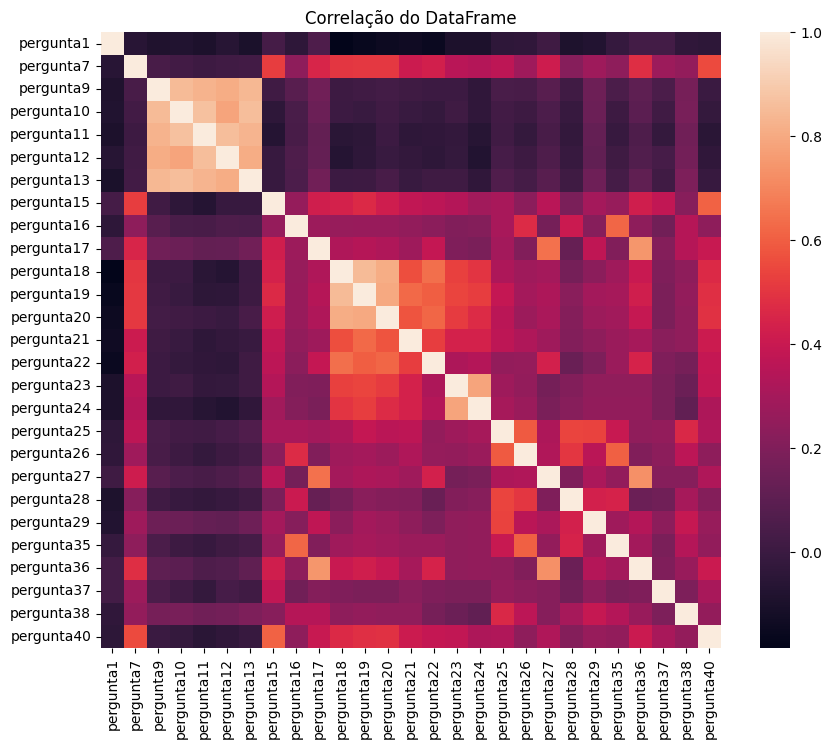

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(df2.corr())
plt.title('Correlação do DataFrame')
plt.show()

#Interações

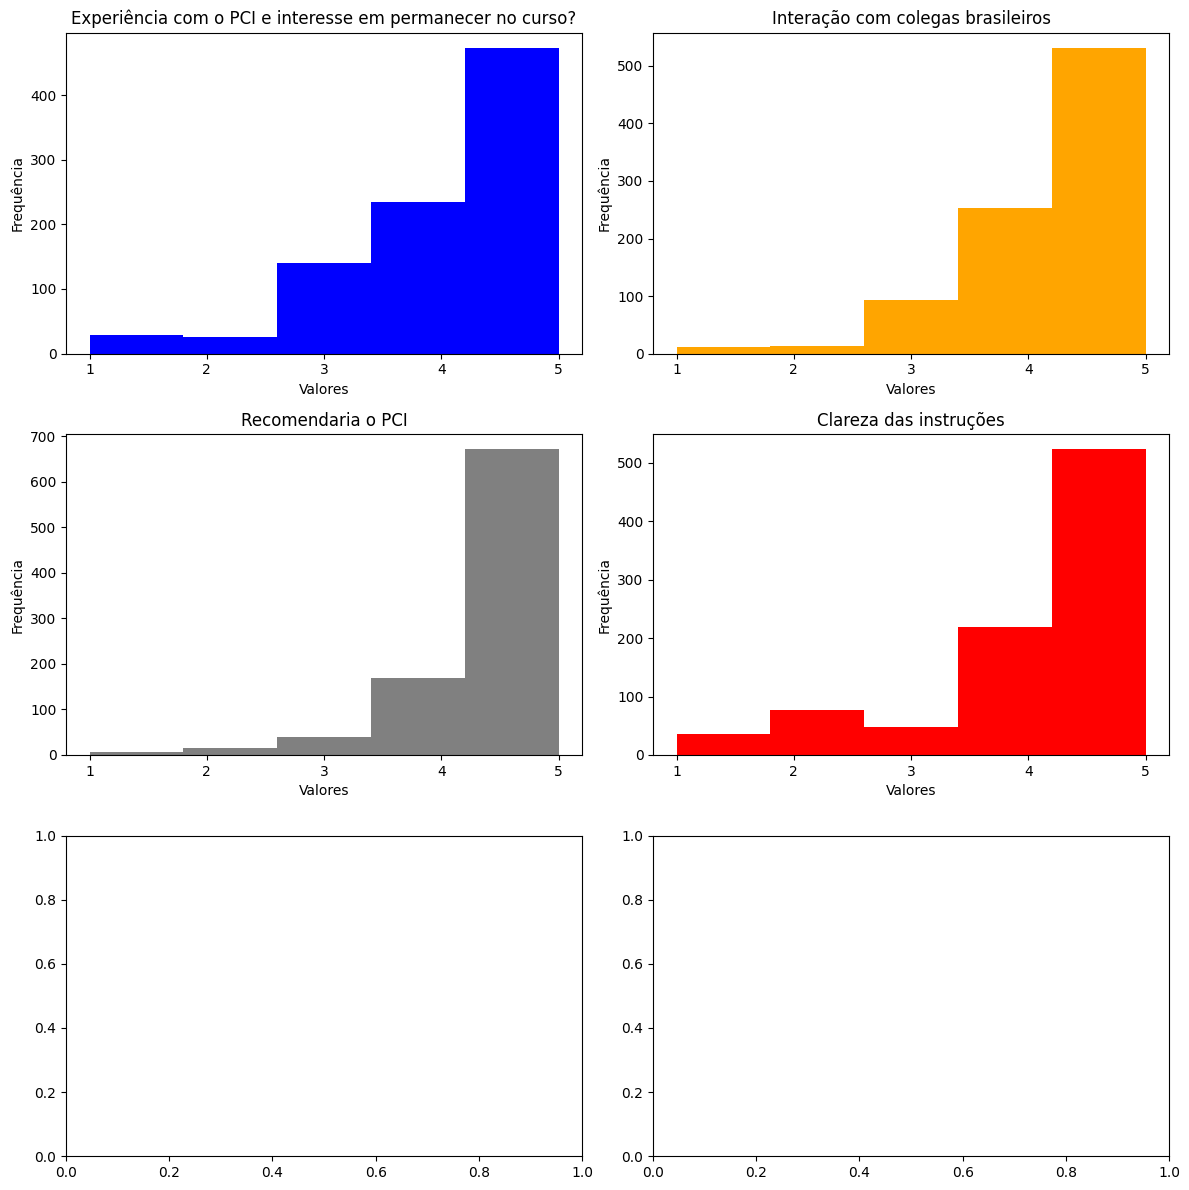

In [ ]:
colunas_selecionadas = ['pergunta15', 'pergunta16', 'pergunta7', 'pergunta18', 'pergunta7']
cores = ['blue', 'orange', 'green', 'red', 'grey']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5)

for i, coluna in enumerate(colunas_selecionadas):
    row, col = divmod(i, 2) if i < 4 else divmod(i-2, 2)
    axs[row, col].hist(df2[coluna], bins=5, color=cores[i])
    axs[row, col].set_xlabel('Valores')
    axs[row, col].set_ylabel('Frequência')

    if coluna == 'pergunta15':
        axs[row, col].set_title("Experiência com o PCI e interesse em permanecer no curso?")
    elif coluna == 'pergunta16':
        axs[row, col].set_title('Interação com colegas brasileiros')
    elif coluna == 'pergunta17':
        axs[row, col].set_title('recomendaria o pci')
    elif coluna == 'pergunta18':
        axs[row, col].set_title('Clareza das instruções')
    elif coluna == 'pergunta7':
        axs[row, col].set_title('Recomendaria o PCI')

    axs[row, col].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    axs[row, col].set_ylim(0, max(axs[row, col].get_ylim()))

plt.tight_layout()
plt.show()


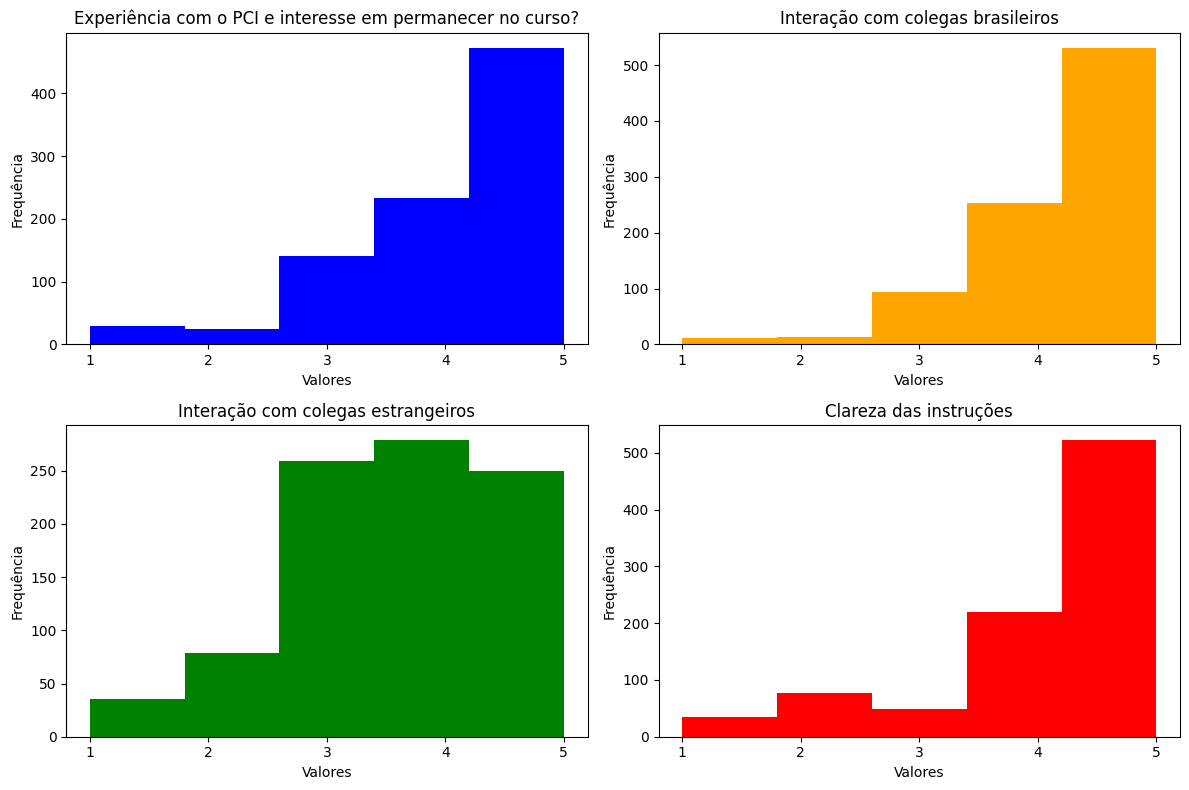

In [ ]:

colunas_selecionadas = ['pergunta15', 'pergunta16', 'pergunta17', 'pergunta18']
cores = ['blue', 'orange', 'green', 'red', 'salmon']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

for i, coluna in enumerate(colunas_selecionadas):
    row, col = divmod(i, 2)
    axs[row, col].hist(df2[coluna], bins=5, color=cores[i])
    axs[row, col].set_xlabel('Valores')
    axs[row, col].set_ylabel('Frequência')

    if coluna == 'pergunta15':
        axs[row, col].set_title("Experiência com o PCI e interesse em permanecer no curso?")
    elif coluna == 'pergunta16':
        axs[row, col].set_title('Interação com colegas brasileiros')
    elif coluna == 'pergunta17':
        axs[row, col].set_title('Interação com colegas estrangeiros')
    elif coluna == 'pergunta18':
        axs[row, col].set_title('Clareza das instruções')

    axs[row, col].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    axs[row, col].set_ylim(0, max(axs[row, col].get_ylim()))

plt.tight_layout()

plt.show()


In [ ]:
map1 = ['0',"Discordo totalmente","Discordo parcialmente","Não concordo nem discordo","Concordo Parcialmente","Concordo Totalmente"]

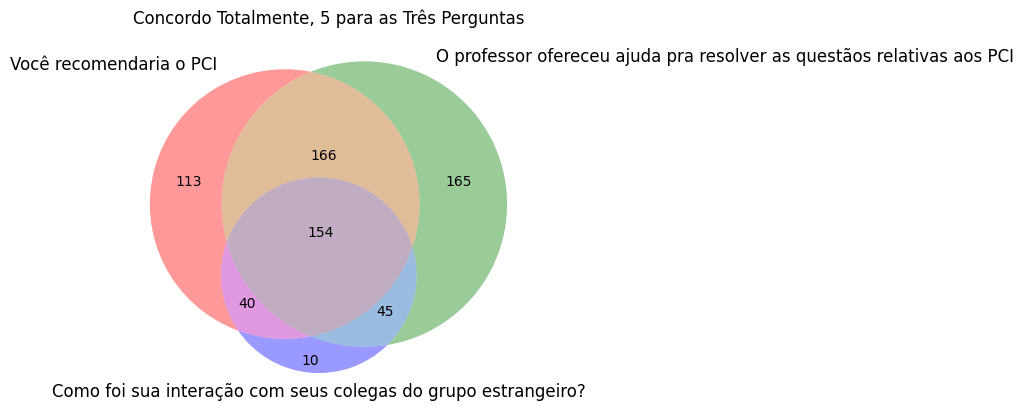

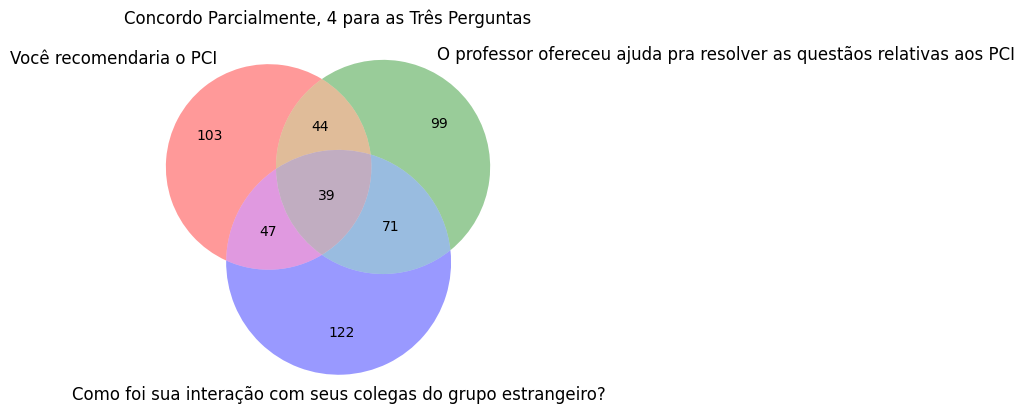

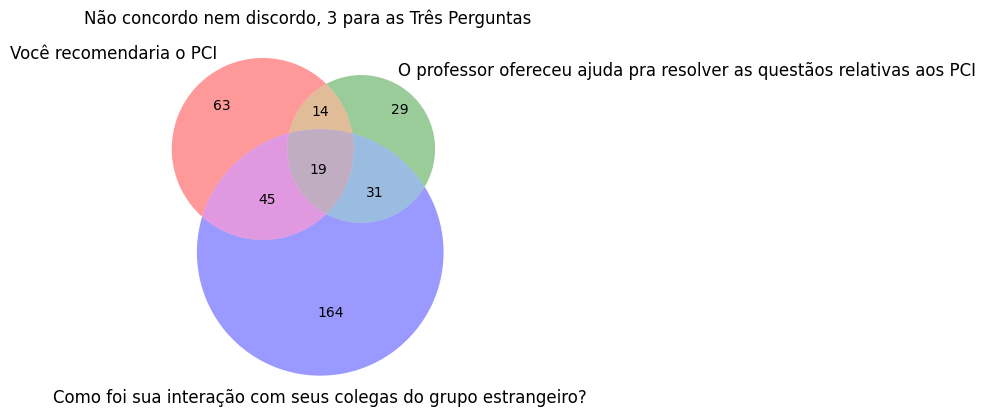

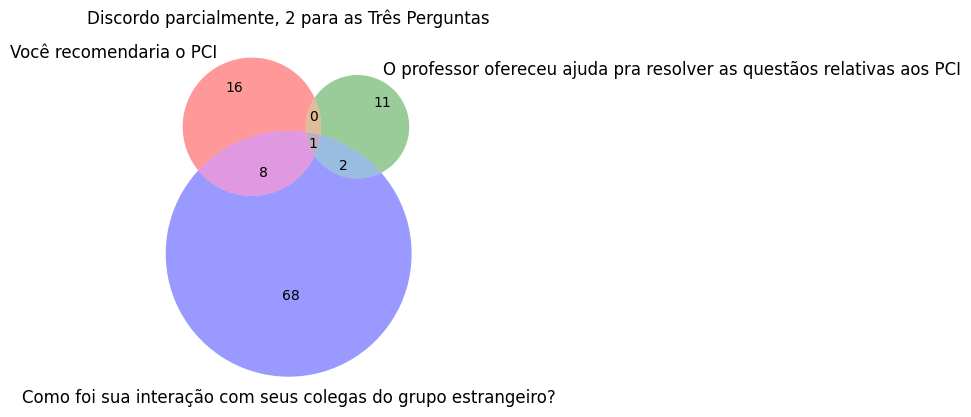

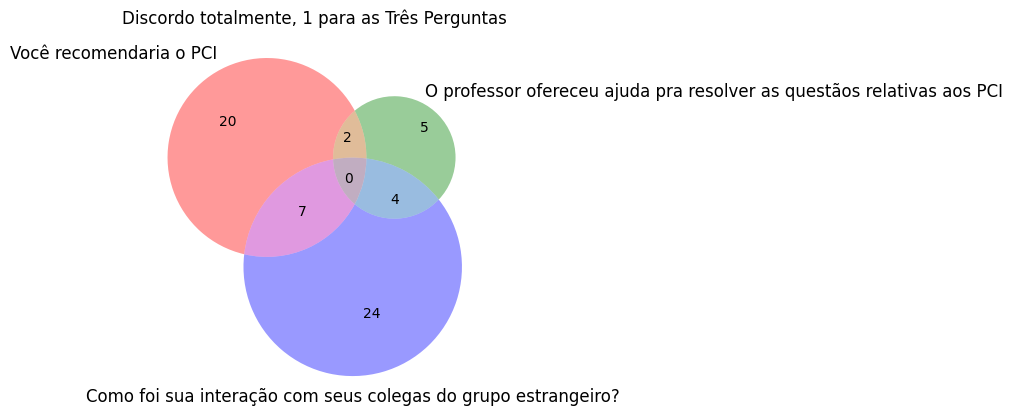

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

for nota in range(5, 0, -1):
    conjunto_A = set(df1[df1['pergunta15'] == nota]['pergunta1'])
    conjunto_B = set(df1[df1['pergunta16'] == nota]['pergunta1'])
    conjunto_C = set(df1[df1['pergunta17'] == nota]['pergunta1'])

    intersecao_total = conjunto_A & conjunto_B & conjunto_C

    venn_diagram = venn3([conjunto_A, conjunto_B, conjunto_C], ('Você recomendaria o PCI',
                                                                'O professor ofereceu ajuda pra resolver as questãos relativas aos PCI',
                                                                'Como foi sua interação com seus colegas do grupo estrangeiro?'))

    venn_diagram.get_label_by_id('111').set_text(str(len(intersecao_total)))


    plt.title(f"{map1[nota]}, {nota} para as Três Perguntas")
    plt.show()


##O que os participantes pensam sobre o PCI?



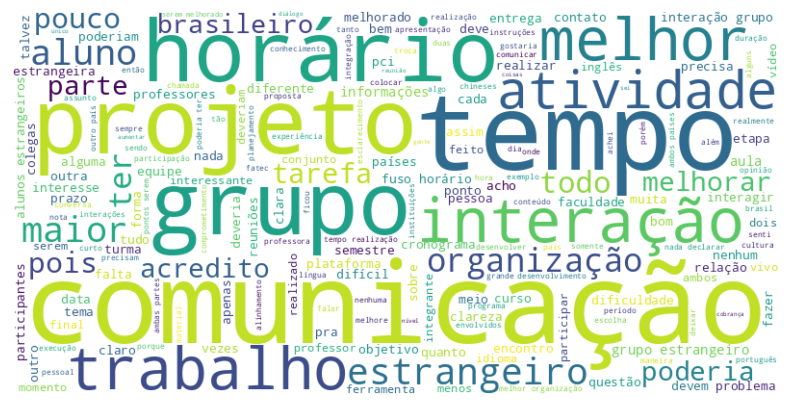

In [ ]:
def preprocess(text):

    words = word_tokenize(str(text))

    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stopwords.words('portuguese')]
    return " ".join(words)


df1['palavras_processadas'] = df1['pergunta32'].apply(preprocess)

palavras = " ".join(df1['palavras_processadas'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(palavras)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


###Com relação ao trabalho em equipe, o que foi mais desafiador para você?


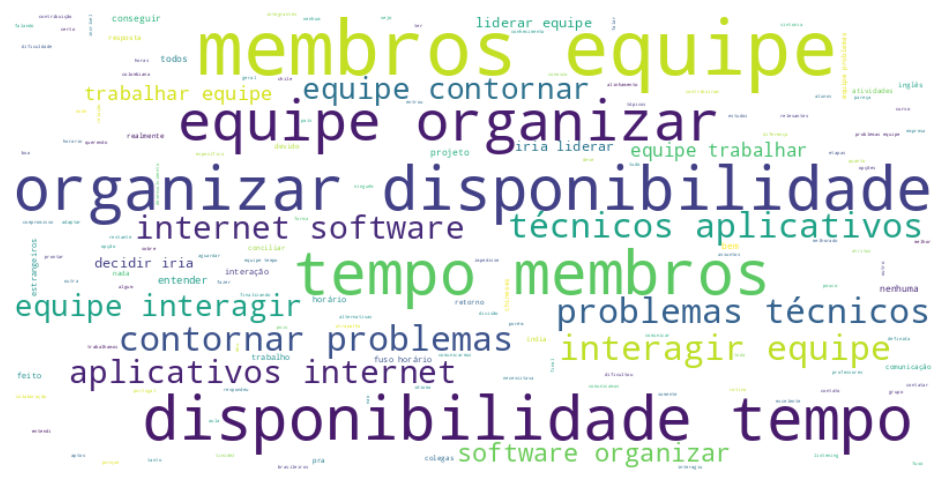

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df1['palavras_processadas'] = df1['pergunta33'].apply(preprocess)

palavras = " ".join(df1['palavras_processadas']).replace(';', ' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(palavras)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


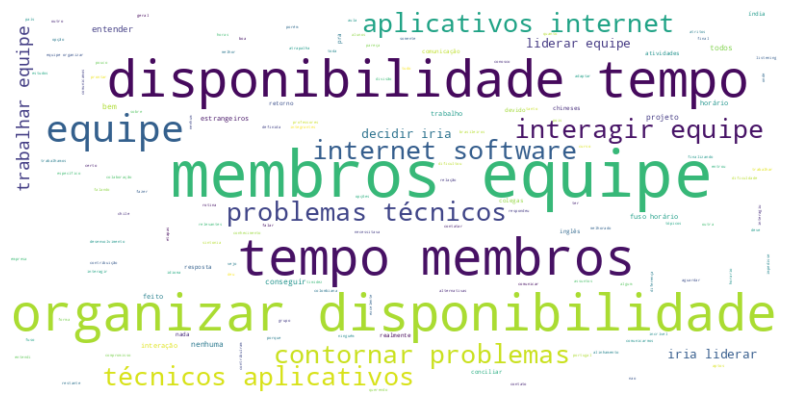

In [ ]:
df1['palavras_processadas'] = df1['pergunta33'].apply(preprocess)

palavras = " a ".join(df1['palavras_processadas']).replace(';', ' a ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(palavras)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#Sobre organizaçao do projeto

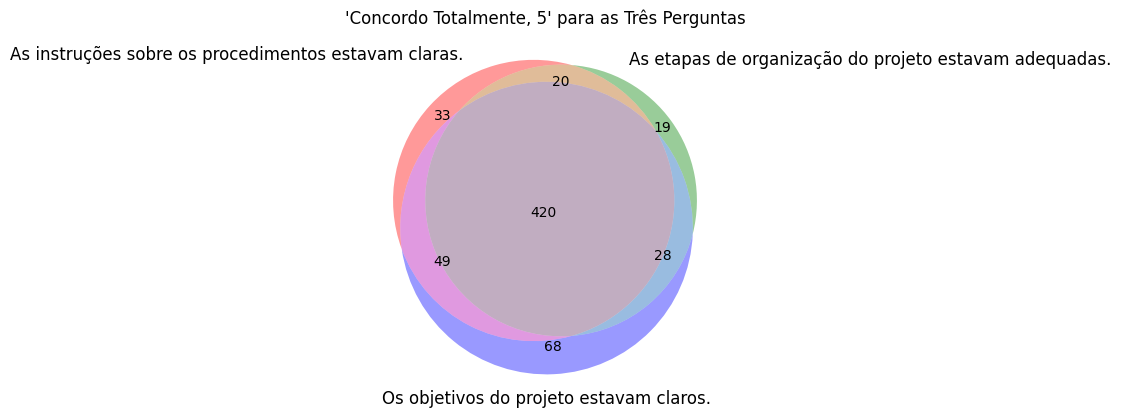

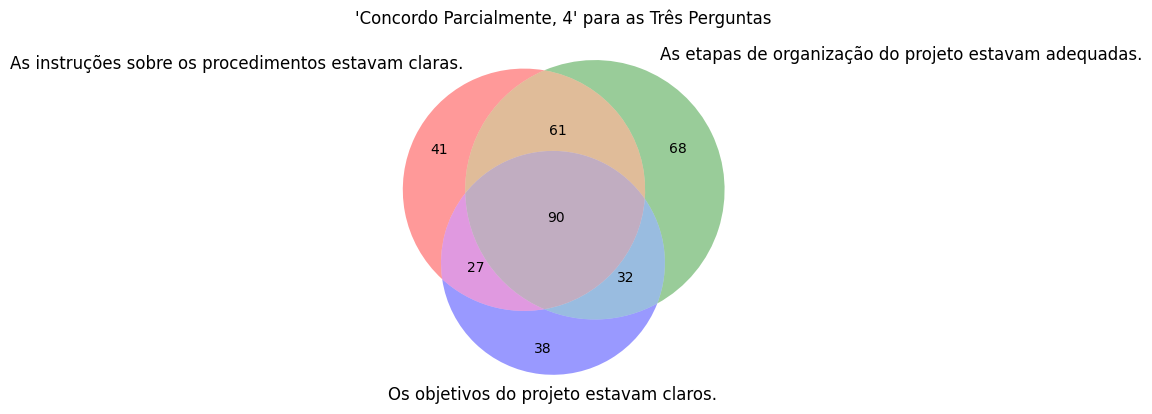

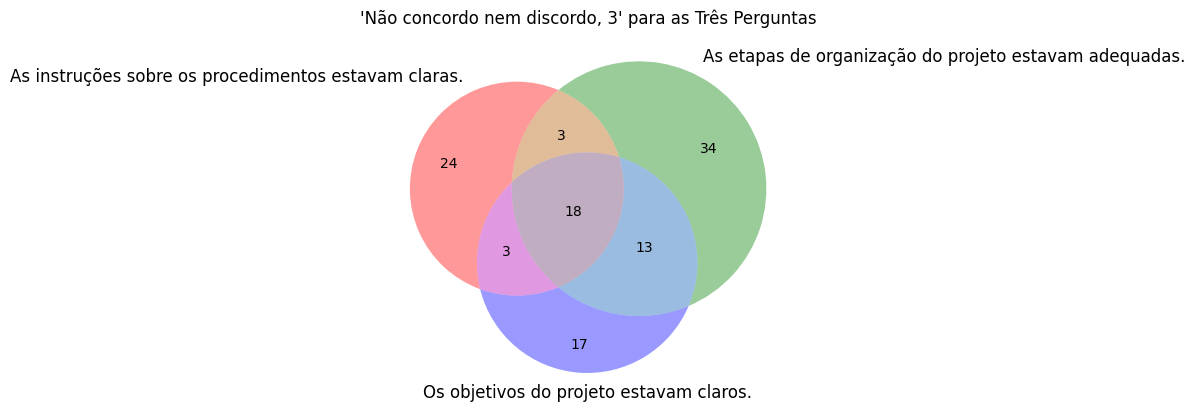

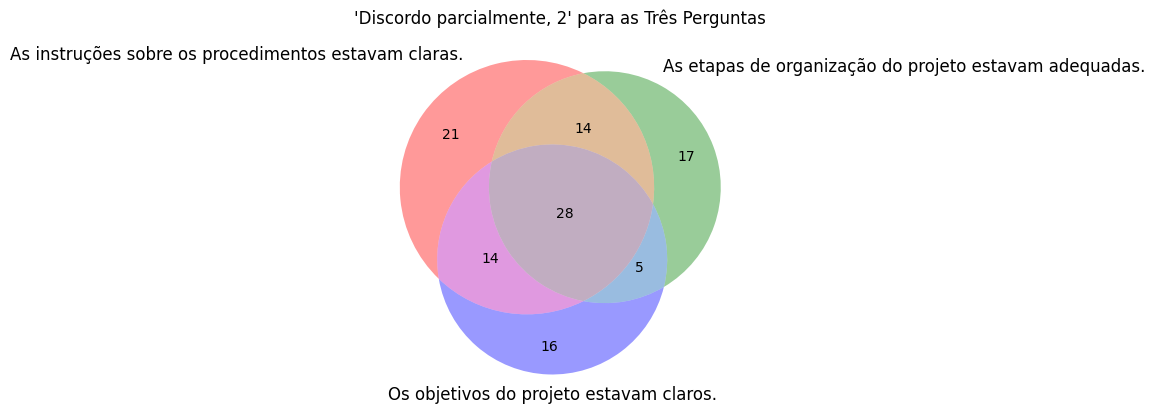

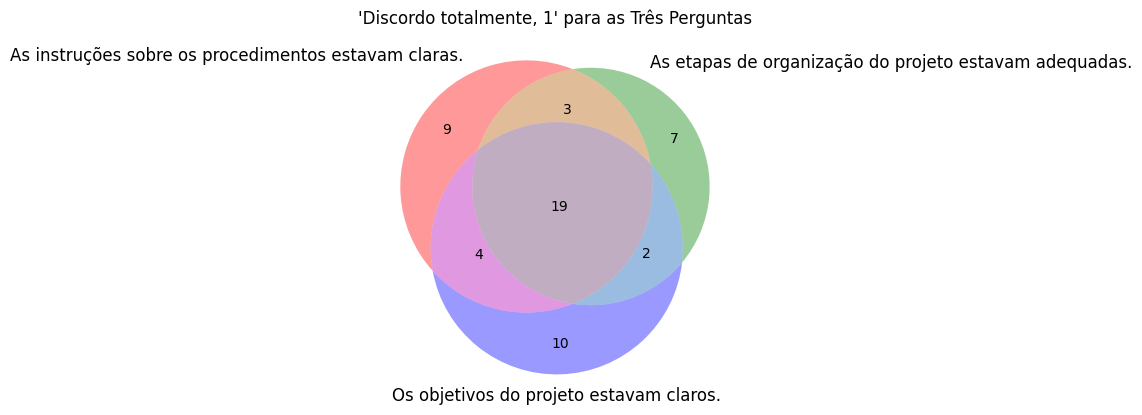

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Criando conjuntos para cada nota de 5 a 1
for nota in range(5, 0, -1):
    conjunto_A = set(df1[df1['pergunta18'] == nota]['pergunta1'])
    conjunto_B = set(df1[df1['pergunta19'] == nota]['pergunta1'])
    conjunto_C = set(df1[df1['pergunta20'] == nota]['pergunta1'])

    intersecao_total = conjunto_A & conjunto_B & conjunto_C

    venn_diagram = venn3([conjunto_A, conjunto_B, conjunto_C], ('As instruções sobre os procedimentos estavam claras.',
                                                                'As etapas de organização do projeto estavam adequadas.',
                                                                'Os objetivos do projeto estavam claros.'))

    venn_diagram.get_label_by_id('111').set_text(str(len(intersecao_total)))

    plt.title(f"'{map1[nota]}, {nota}' para as Três Perguntas")
    plt.show()



#Ferramentas Usadas:

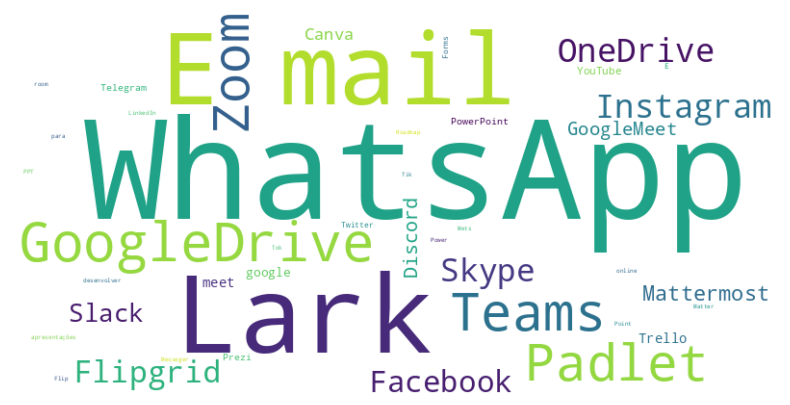

In [ ]:
palavras = " a,- ".join(df1['pergunta30']).replace(';', ' a,- ').replace('Google Drive (Docs, Sheets & Slides)', 'GoogleDrive').replace('Google meet','GoogleMeet').replace('Google Meet','GoogleMeet')

palavras_tokenizadas = word_tokenize(palavras)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(palavras_tokenizadas))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


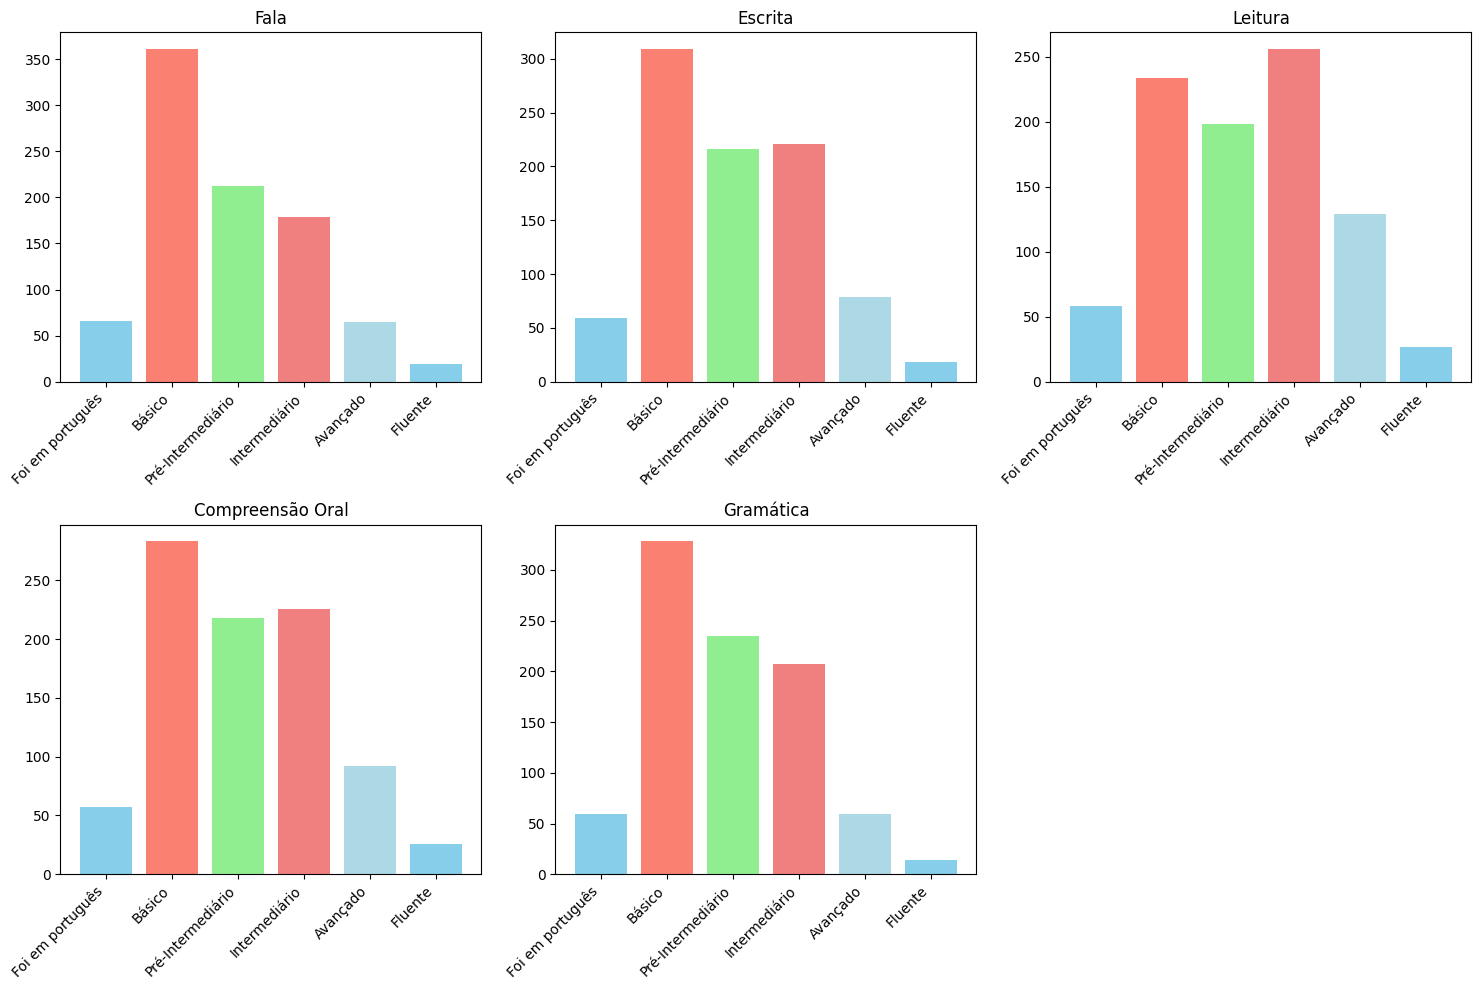

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

perguntas = ['Fala', 'Escrita', 'Leitura', 'Compreensão Oral', 'Gramática']
categorias = ['Foi em português','Básico', 'Pré-Intermediário', 'Intermediário' , 'Avançado', 'Fluente']

valores_fala = [66,361, 212, 179, 65, 19]
valores_escrita = [59,309, 216, 221,  79, 18]
valores_leitura = [58,234, 198, 256,  129, 27]
valores_compreensao_oral = [57,283, 218, 226, 92, 26]
valores_gramatica = [59,328, 235, 207, 59, 14]

cores = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightblue']

df_fala = pd.DataFrame({'Categoria': categorias, 'Fala': valores_fala})
df_escrita = pd.DataFrame({'Categoria': categorias, 'Escrita': valores_escrita})
df_leitura = pd.DataFrame({'Categoria': categorias, 'Leitura': valores_leitura})
df_compreensao_oral = pd.DataFrame({'Categoria': categorias, 'Compreensão Oral': valores_compreensao_oral})
df_gramatica = pd.DataFrame({'Categoria': categorias, 'Gramática': valores_gramatica})

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].bar(df_fala['Categoria'], df_fala['Fala'], color=cores)
axs[0, 0].set_title('Fala')

axs[0, 1].bar(df_escrita['Categoria'], df_escrita['Escrita'], color=cores)
axs[0, 1].set_title('Escrita')

axs[0, 2].bar(df_leitura['Categoria'], df_leitura['Leitura'], color=cores)
axs[0, 2].set_title('Leitura')

axs[1, 0].bar(df_compreensao_oral['Categoria'], df_compreensao_oral['Compreensão Oral'], color=cores)
axs[1, 0].set_title('Compreensão Oral')

axs[1, 1].bar(df_gramatica['Categoria'], df_gramatica['Gramática'], color=cores)
axs[1, 1].set_title('Gramática')

axs[1, 2].axis('off')

for ax in axs.flat:
    ax.set_xticks(ax.get_xticks())
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


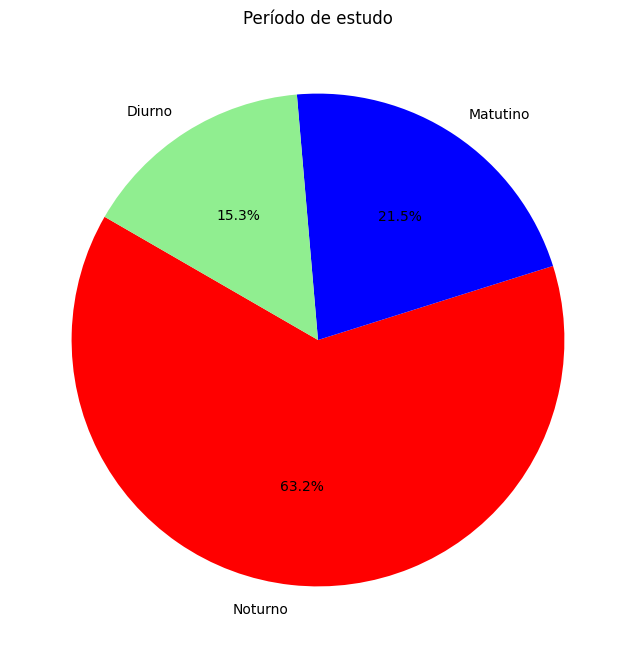

In [ ]:
periodos = ['Noturno', 'Matutino', 'Diurno']
quantidades = [570, 194, 138]

plt.figure(figsize=(8, 8))
plt.pie(quantidades, labels=periodos, autopct='%1.1f%%', startangle=150, colors=['red', 'blue', 'lightgreen'])
plt.title('Período de estudo')
plt.show()


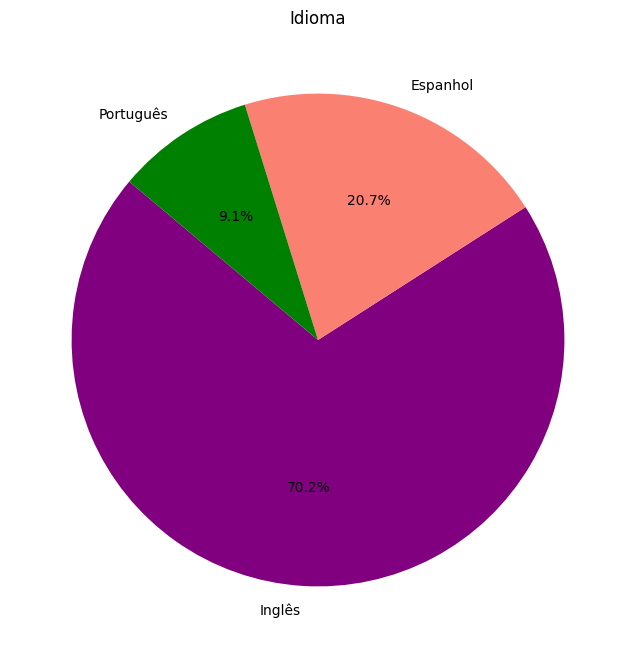

In [ ]:
idiomas = ['Inglês', 'Espanhol', 'Português']
quantidades = [633, 187, 82]

plt.figure(figsize=(8, 8))
plt.pie(quantidades, labels=idiomas, autopct='%1.1f%%', startangle=140, colors=['purple', 'salmon', 'green'])
plt.title('Idioma')
plt.show()


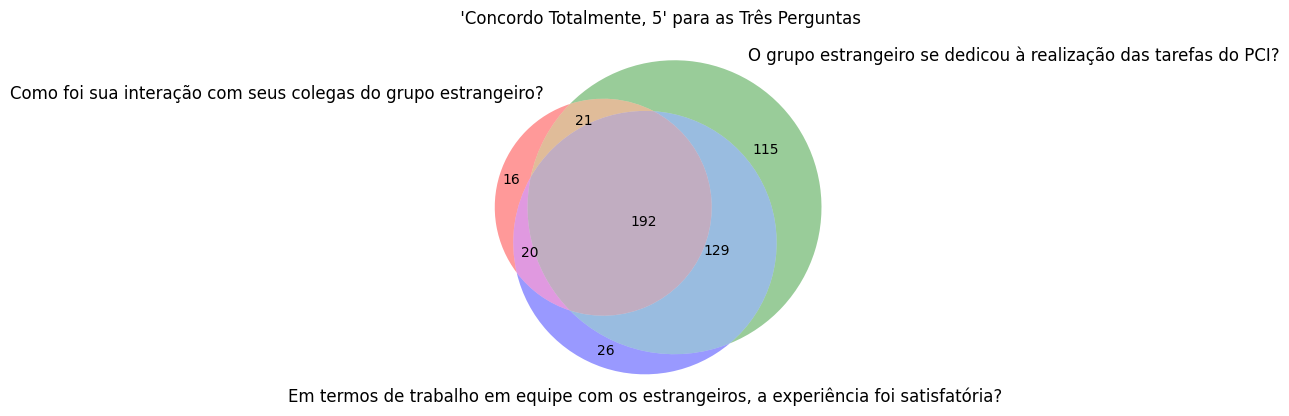

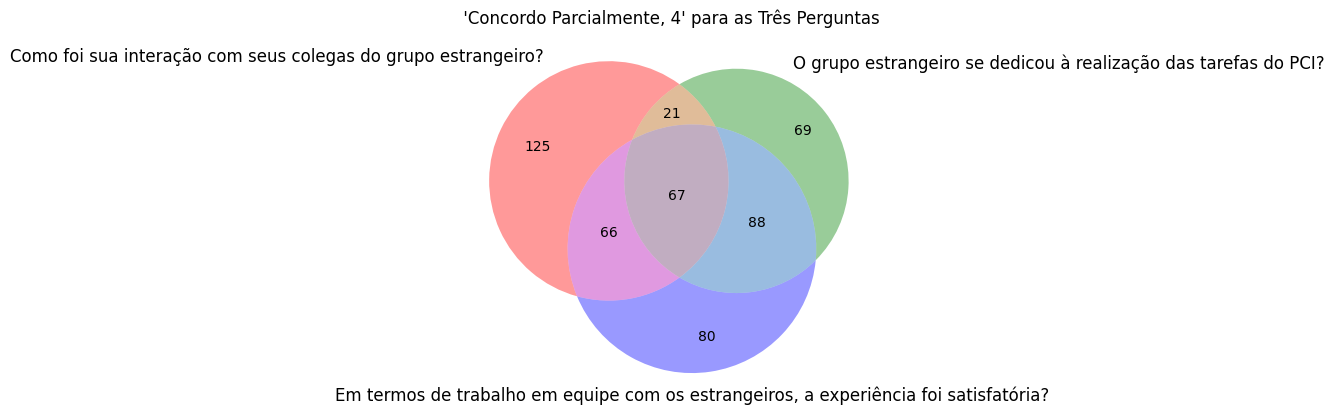

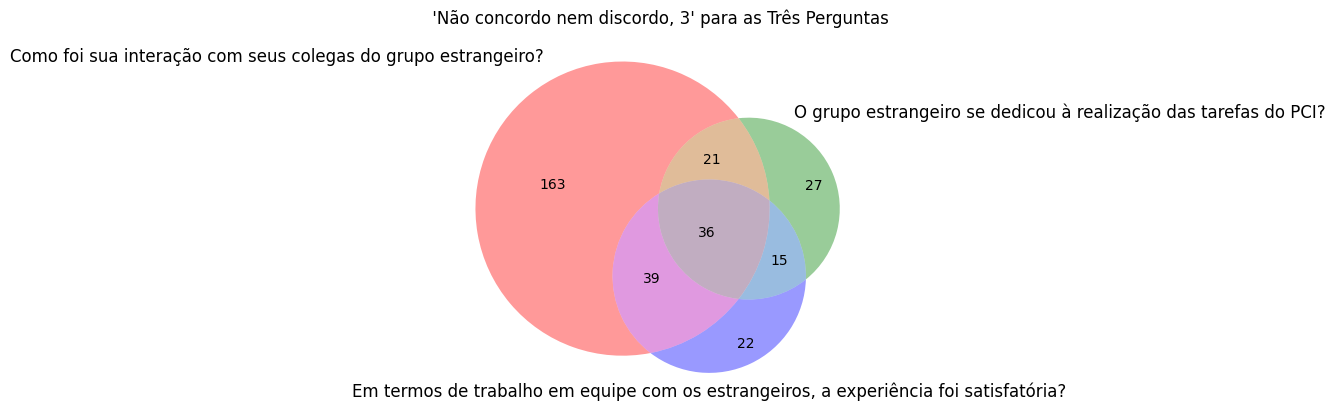

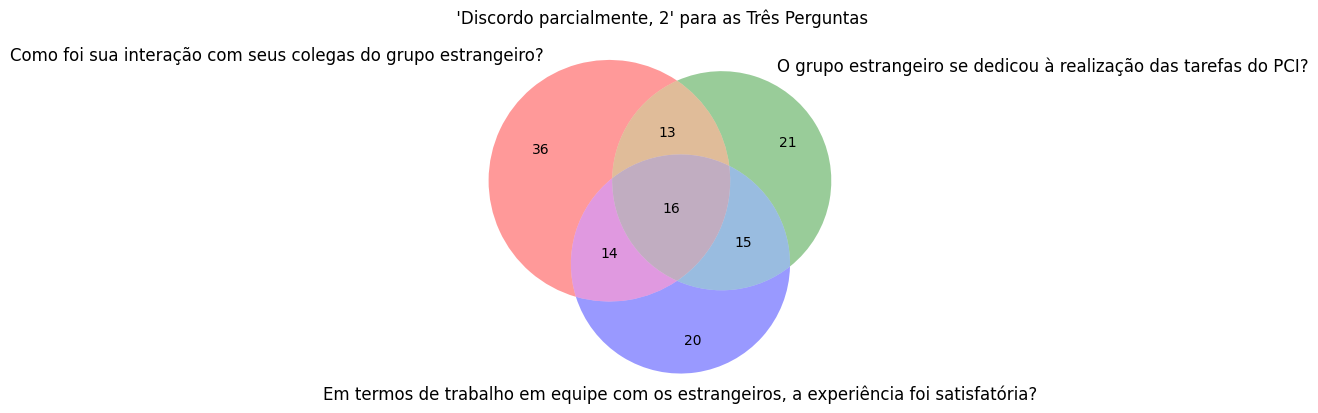

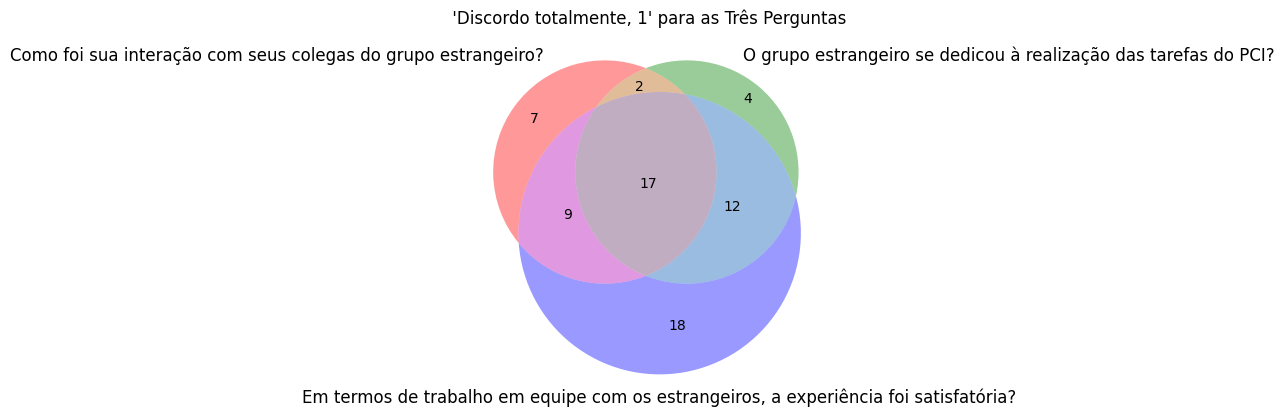

In [ ]:
for nota in range(5, 0, -1):
    conjunto_A = set(df1[df1['pergunta17'] == nota]['pergunta1'])
    conjunto_B = set(df1[df1['pergunta27'] == nota]['pergunta1'])
    conjunto_C = set(df1[df1['pergunta36'] == nota]['pergunta1'])

    intersecao_total = conjunto_A & conjunto_B & conjunto_C

    venn_diagram = venn3([conjunto_A, conjunto_B, conjunto_C], ('Como foi sua interação com seus colegas do grupo estrangeiro? ',
                                                                'O grupo estrangeiro se dedicou à realização das tarefas do PCI?',
                                                                'Em termos de trabalho em equipe com os estrangeiros, a experiência foi satisfatória?'))

    venn_diagram.get_label_by_id('111').set_text(str(len(intersecao_total)))


    plt.title(f" '{map1[nota]}, {nota}' para as Três Perguntas")
    plt.show()


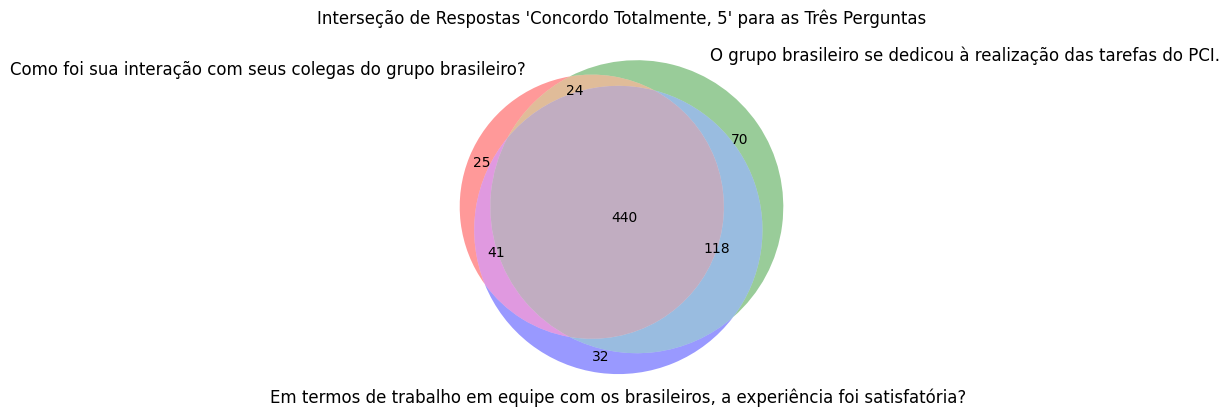

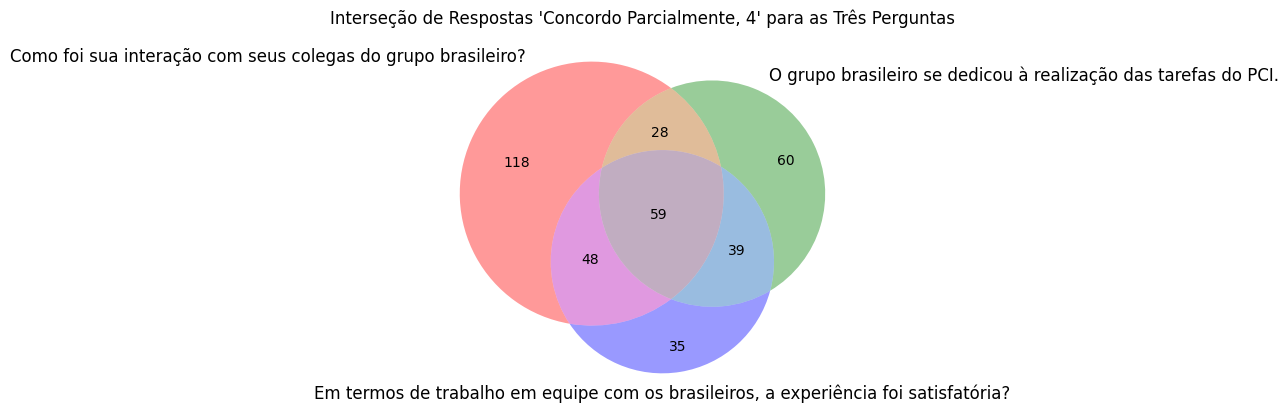

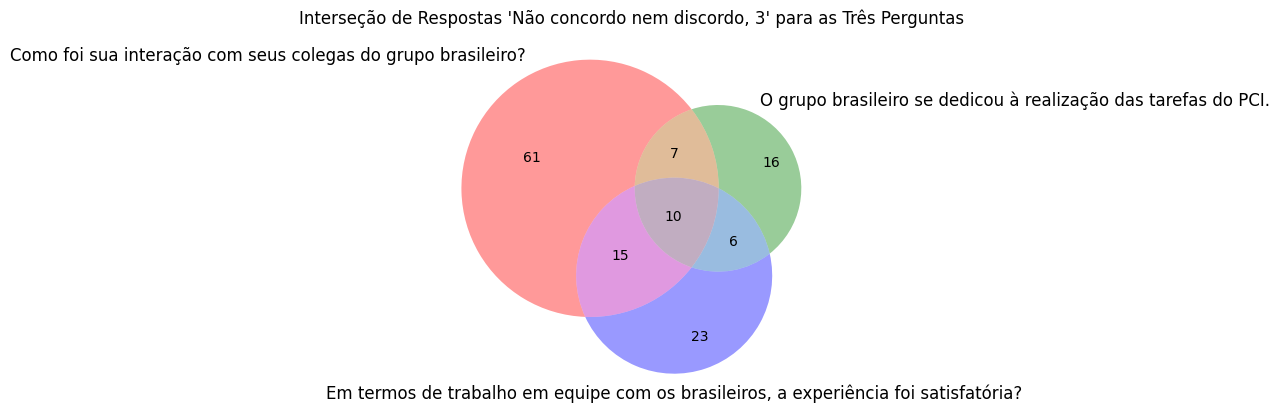

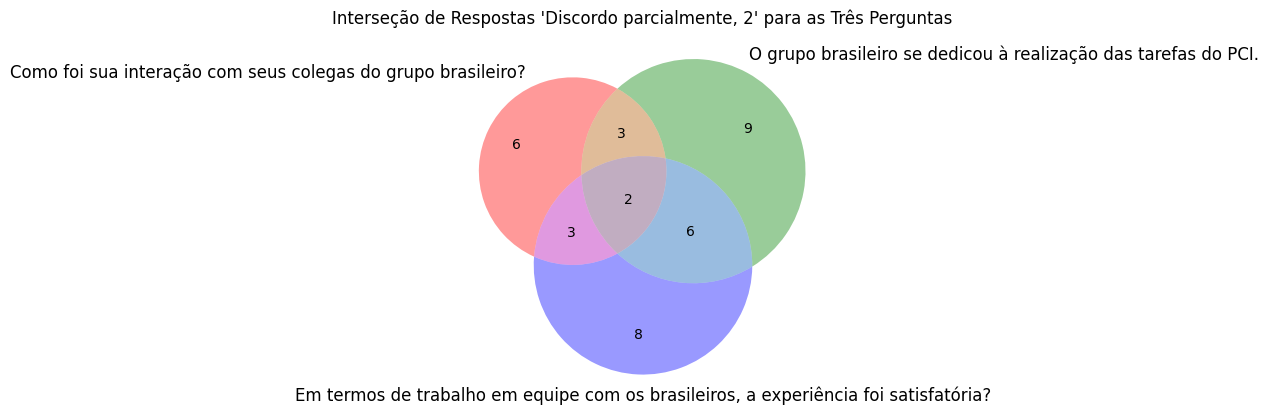

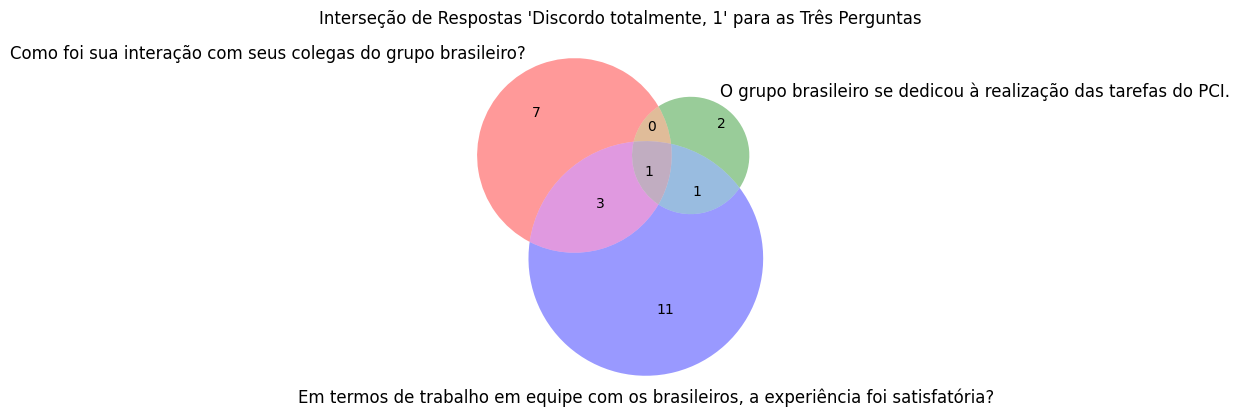

In [ ]:
for nota in range(5, 0, -1):
    conjunto_A = set(df1[df1['pergunta16'] == nota]['pergunta1'])
    conjunto_B = set(df1[df1['pergunta26'] == nota]['pergunta1'])
    conjunto_C = set(df1[df1['pergunta35'] == nota]['pergunta1'])

    intersecao_total = conjunto_A & conjunto_B & conjunto_C

    venn_diagram = venn3([conjunto_A, conjunto_B, conjunto_C], ('Como foi sua interação com seus colegas do grupo brasileiro?',
                                                                'O grupo brasileiro se dedicou à realização das tarefas do PCI.',
                                                                'Em termos de trabalho em equipe com os brasileiros, a experiência foi satisfatória?'))

    venn_diagram.get_label_by_id('111').set_text(str(len(intersecao_total)))

    plt.title(f"Interseção de Respostas '{map1[nota]}, {nota}' para as Três Perguntas")
    plt.show()


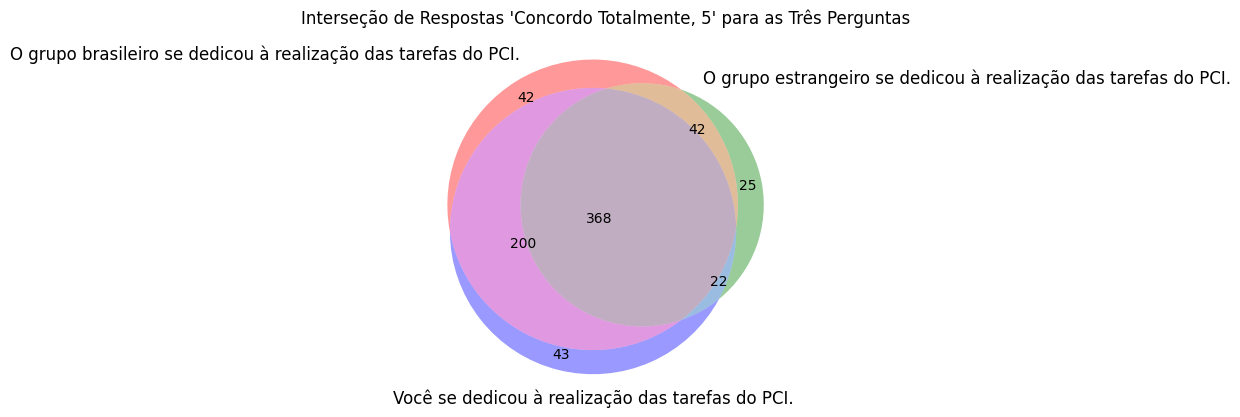

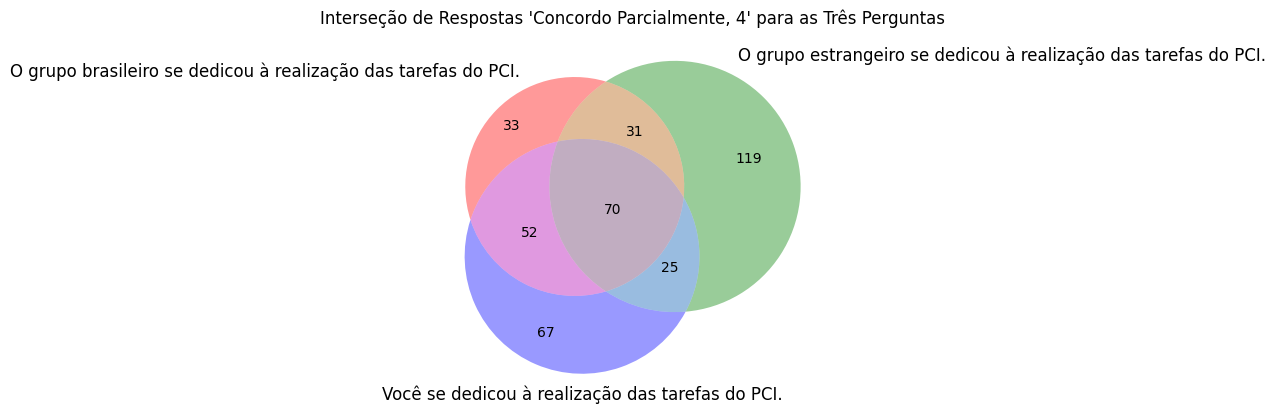

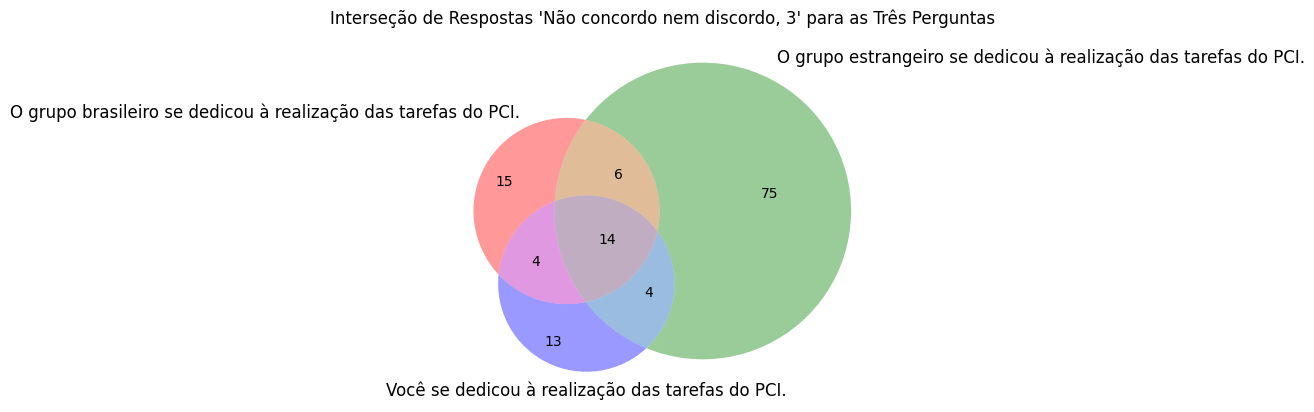

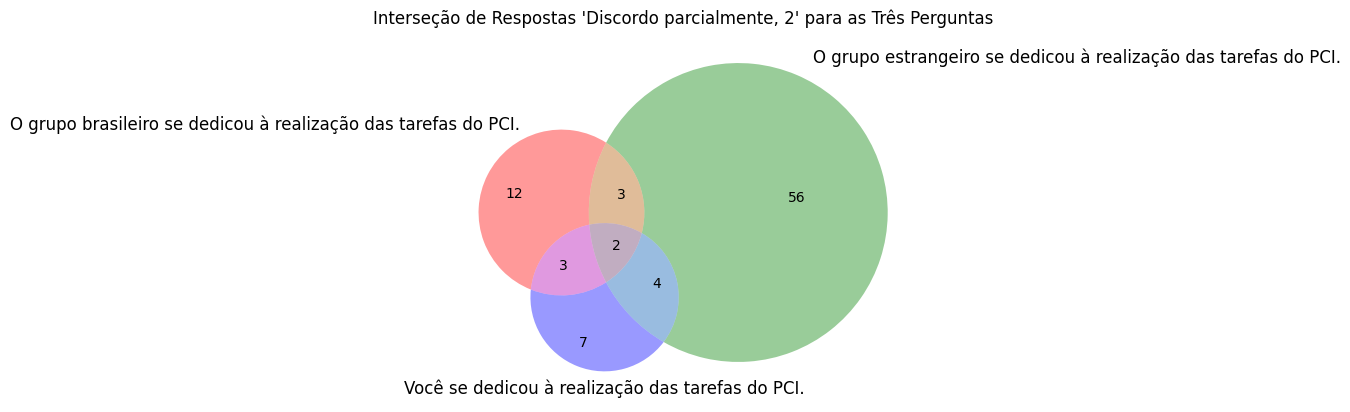

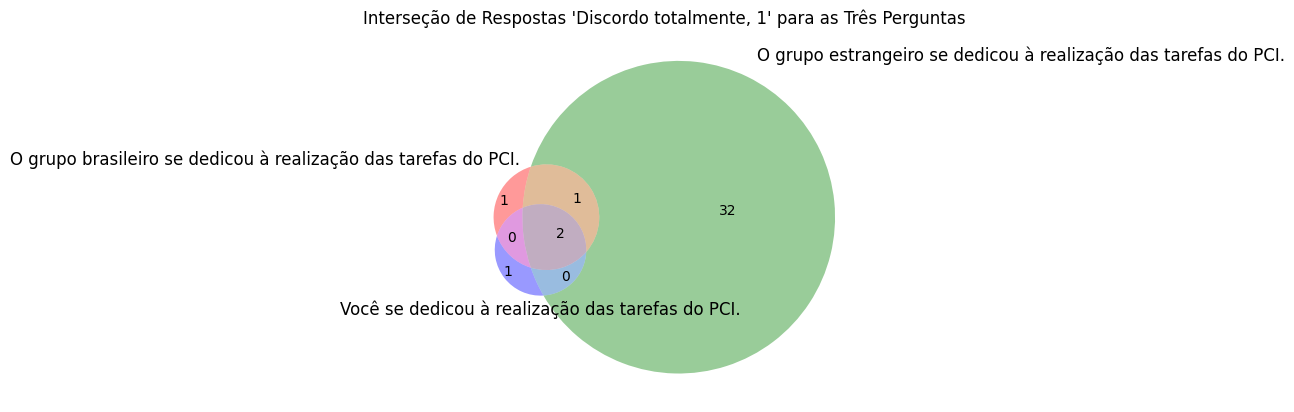

In [ ]:
for nota in range(5, 0, -1):
    conjunto_A = set(df1[df1['pergunta26'] == nota]['pergunta1'])
    conjunto_B = set(df1[df1['pergunta27'] == nota]['pergunta1'])
    conjunto_C = set(df1[df1['pergunta25'] == nota]['pergunta1'])

    intersecao_total = conjunto_A & conjunto_B & conjunto_C

    venn_diagram = venn3([conjunto_A, conjunto_B, conjunto_C], ('O grupo brasileiro se dedicou à realização das tarefas do PCI.',
                                                                'O grupo estrangeiro se dedicou à realização das tarefas do PCI.',
                                                                'Você se dedicou à realização das tarefas do PCI.'))
    venn_diagram.get_label_by_id('111')

    plt.title(f"Interseção de Respostas '{map1[nota]}, {nota}' para as Três Perguntas")
    plt.show()


Vamos trabalhar com todos os dados


In [ ]:
#Arquivo dos Alunos
df101= pd.read_excel('/content/Anonimizados/Pesquisa de Percepção sobre o Projeto Colaborativo Internacional – CESUDiscentes-2S2020(1-387).xlsx')
df102= pd.read_excel('/content/Anonimizados/Pesquisa de Percepção sobre o Projeto Colaborativo Internacional – CESU Discentes - 1s2021.xlsx')
df103= pd.read_excel('/content/Anonimizados/Pesquisa de Percepção sobre o PCI – Cesu Discentes - 2s2021.xlsx')
df105= pd.read_excel('/content/Anonimizados/Pesquisa de Percepção sobre o PCI – Cesu Discentes - 1s2022.xlsx')
df106= pd.read_excel('/content/Anonimizados/1s2022 Discentes - Pesquisa de Percepção sobre o PCI da Cesu.xlsx')
df107= pd.read_excel('/content/Anonimizados/1s2023 Discentes - Pesquisa de Percepção sobre o PCI da Cesu.xlsx')


In [ ]:
#Arquivos dos docentes
df120= pd.read_excel('/content/Anonimizados/1s2022 Docentes -Pesquisa de Percepção sobre o Projeto Colaborativo Internacional PCI_CESU (1-99).xlsx')
df121= pd.read_excel('/content/Anonimizados/2s2022 Docentes -Pesquisa de Percepção sobre o Projeto Colaborativo Internacional PCI_CESU (1-47).xlsx')

In [ ]:
df106.drop('O seu projeto de PCI ocorreu em qual Fatec e com qual instituição estrangeira?2',axis= 1, inplace= True)
df106.drop('O seu projeto de PCI ocorreu em qual Fatec e com qual instituição estrangeira?3',axis= 1, inplace= True)
df107.drop('Explique sua resposta à questão anterior.2',axis= 1, inplace= True)
df107.drop('Explique sua resposta à questão anterior.',axis= 1, inplace= True)


In [ ]:
df121.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 47 columns):
 #   Column                                                                                                                                                                                                   Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                   --------------  -----         
 0   ID                                                                                                                                                                                                       47 non-null     int64         
 1   Hora de início                                                                                                                                                                       

In [ ]:
dfs = [df101,df102,df103,df105,df106,df107]
j=0
for df in dfs:
  i=0
  j= j+1
  for coluna in df.columns:
    i= i+1
    print(' ----------------- ')
    print(' ')
    print('pergunta'+str(i))
    print([j])
    print(coluna)
    print(df[coluna].value_counts())


 ----------------- 
 
pergunta1
[1]
ID
3      1
293    1
267    1
266    1
265    1
      ..
129    1
128    1
127    1
126    1
389    1
Name: ID, Length: 387, dtype: int64
 ----------------- 
 
pergunta2
[1]
Hora de início
2020-12-10 12:17:33    2
2020-12-02 21:22:40    1
2020-12-02 23:07:34    1
2020-12-02 22:50:20    1
2020-12-02 22:49:49    1
                      ..
2020-11-30 17:05:33    1
2020-11-30 15:54:58    1
2020-11-30 14:46:29    1
2020-11-30 14:42:39    1
2020-12-11 10:38:29    1
Name: Hora de início, Length: 386, dtype: int64
 ----------------- 
 
pergunta3
[1]
Hora de conclusão
2020-11-20 20:38:16    1
2020-12-03 19:13:39    1
2020-12-02 23:22:06    1
2020-12-02 23:12:43    1
2020-12-02 23:04:50    1
                      ..
2020-11-30 17:14:03    1
2020-11-30 16:04:44    1
2020-11-30 14:51:45    1
2020-11-30 14:51:38    1
2020-12-11 11:14:54    1
Name: Hora de conclusão, Length: 387, dtype: int64
 ----------------- 
 
pergunta4
[1]
Qual é a sua Fatec?
Fatec Americana 

In [ ]:
df1011 = df103.copy()

In [ ]:
df1011
df1011.rename(columns={'ID': 'pergunta01'}, inplace=True)
df1011.rename(columns={'Start time': 'pergunta02'}, inplace=True)
df1011.rename(columns={'Completion time': 'pergunta03'}, inplace=True)
df1011.rename(columns={'O seu projeto de PCI ocorreu em qual Fatec e com qual instituição estrangeira?': 'pergunta04'}, inplace=True)
df1011.rename(columns={'Em qual período você estuda?': 'pergunta05'}, inplace=True)
df1011.rename(columns={'Quantas vezes você já participou de um PCI?': 'pergunta06'}, inplace=True)
df1011.rename(columns={'Recomendaria aos seus colegas participar em um PCI.': 'pergunta07'}, inplace=True)
df1011.rename(columns={'Você participou de um PCI em qual idioma?': 'pergunta08'}, inplace=True)
df1011.rename(columns={'Fala': 'pergunta09'}, inplace=True)
df1011.rename(columns={'Escrita': 'pergunta10'}, inplace=True)
df1011.rename(columns={'Leitura': 'pergunta11'}, inplace=True)
df1011.rename(columns={'Compreensão Oral': 'pergunta12'}, inplace=True)
df1011.rename(columns={'Gramática': 'pergunta13'}, inplace=True)
df1011.rename(columns={'Com a interação proporcionada pelo PCI, a sua competência no idioma estrangeiro': 'pergunta14'}, inplace=True)
df1011.rename(columns={'Quanto à afirmação "A experiência com o PCI melhora o desempenho acadêmico e aumenta as chances de sucesso no mercado de trabalho", eu': 'pergunta15'}, inplace=True)
df1011.rename(columns={'Como foi sua interação com seus colegas do grupo brasileiro?': 'pergunta16'}, inplace=True)
df1011.rename(columns={'Como foi sua interação com seus colegas do grupo estrangeiro?': 'pergunta17'}, inplace=True)
df1011.rename(columns={'As instruções sobre os procedimentos estavam claras.': 'pergunta18'}, inplace=True)
df1011.rename(columns={'As etapas de organização do projeto estavam adequadas.': 'pergunta19'}, inplace=True)
df1011.rename(columns={'Os objetivos do projeto estavam claros.': 'pergunta20'}, inplace=True)
df1011.rename(columns={'O tempo para a realização das tarefas foi suficiente.': 'pergunta21'}, inplace=True)
df1011.rename(columns={'O grupo estrangeiro tinha as mesmas informações que o grupo brasileiro.': 'pergunta22'}, inplace=True)
df1011.rename(columns={'O(a) professor(a) dedicou tempo de aula para a resolução de dúvidas.': 'pergunta23'}, inplace=True)
df1011.rename(columns={'O(a) professor(a) ofereceu ajuda para resolver questões relativas aos PCIs.': 'pergunta24'}, inplace=True)
df1011.rename(columns={'Você se dedicou à realização das tarefas do PCI.': 'pergunta25'}, inplace=True)
df1011.rename(columns={'O grupo brasileiro se dedicou à realização das tarefas do PCI.': 'pergunta26'}, inplace=True)
df1011.rename(columns={'O grupo estrangeiro se dedicou à realização das tarefas do PCI.': 'pergunta27'}, inplace=True)
df1011.rename(columns={'Você buscou interagir com o grupo brasileiro.': 'pergunta28'}, inplace=True)
df1011.rename(columns={'Você buscou interagir com o grupo estrangeiro.': 'pergunta29'}, inplace=True)
df1011.rename(columns={'Quais ferramentas você utilizou para a realização do PCI? (Marque todas as que você utilizou para se comunicar com as equipes e realizar as tarefas propostas)': 'pergunta30'}, inplace=True)
df1011.rename(columns={'Aponte os pontos positivos deste PCI.': 'pergunta31'}, inplace=True)
df1011.rename(columns={'Aponte os pontos a serem melhorados neste PCI.': 'pergunta32'}, inplace=True)
df1011.rename(columns={'“Eu estava motivado a participar de um PCI antes de ter tido esta experiência”.': 'pergunta33'}, inplace=True)
df1011.rename(columns={'Faça uma autoavaliação do seu desempenho no projeto.': 'pergunta34'}, inplace=True)
df1011.rename(columns={'Com relação ao trabalho em equipe, o que foi mais desafiador para você? Assinale a alternativa que corresponde à sua percepção.': 'pergunta35'}, inplace=True)
df1011.rename(columns={'Em termos de expectativa, o que você esperava antes do início do PCI. Assinale as alternativas que correspondem à sua percepção.': 'pergunta36'}, inplace=True)
df1011.rename(columns={'Em termos de trabalho em equipe com os brasileiros, a experiência foi satisfatória. (Apenas aqueles que participaram do projeto com SUNY EOP (EUA) em agosto devem marcar a opção "Não se aplica")' : 'pergunta37'}, inplace=True)
df1011.rename(columns={'Em termos de trabalho em equipe com os estrangeiros, a experiência foi satisfatória. (Apenas aqueles que participaram do projeto com SUNY EOP (EUA) em agosto devem marcar a opção "Não se aplica")' : 'pergunta38'}, inplace=True)

#dropi=
i=0
for coluna in df1011.columns:
    i= i+1
    if i == 35:
      df1011.rename(columns={coluna: 'pergunta37'}, inplace=True)
    if i == 36:
      df1011.rename(columns={coluna: 'pergunta38'}, inplace=True)

df1011.drop('Justifique sua resposta à questão anterior.',axis= 1, inplace= True)


In [ ]:
df1012 = df105.copy()

In [ ]:
df1012.rename(columns={'ID': 'pergunta01'}, inplace=True)
df1012.rename(columns={'Start time': 'pergunta02'}, inplace=True)
df1012.rename(columns={'Completion time': 'pergunta03'}, inplace=True)
df1012.rename(columns={'O seu projeto de PCI ocorreu em qual Fatec e com qual instituição estrangeira?': 'pergunta04'}, inplace=True)
df1012.rename(columns={'Em qual período você estuda?': 'pergunta05'}, inplace=True)
df1012.rename(columns={'Quantas vezes você já participou de um PCI?': 'pergunta06'}, inplace=True)
df1012.rename(columns={'Recomendaria aos seus colegas participar em um PCI.': 'pergunta07'}, inplace=True)
df1012.rename(columns={'Você participou de um PCI em qual idioma?': 'pergunta08'}, inplace=True)
df1012.rename(columns={'Fala': 'pergunta09'}, inplace=True)
df1012.rename(columns={'Escrita': 'pergunta10'}, inplace=True)
df1012.rename(columns={'Leitura': 'pergunta11'}, inplace=True)
df1012.rename(columns={'Compreensão Oral': 'pergunta12'}, inplace=True)
df1012.rename(columns={'Gramática': 'pergunta13'}, inplace=True)
df1012.rename(columns={'Com a interação proporcionada pelo PCI, a sua competência no idioma estrangeiro': 'pergunta14'}, inplace=True)
df1012.rename(columns={'Quanto à afirmação "A experiência com o PCI  aumenta as chances de sucesso no mercado de trabalho", eu': 'pergunta15'}, inplace=True)
df1012.rename(columns={'Como foi sua interação com seus colegas do grupo brasileiro?': 'pergunta16'}, inplace=True)
df1012.rename(columns={'Como foi sua interação com seus colegas do grupo estrangeiro?': 'pergunta17'}, inplace=True)
df1012.rename(columns={'As instruções sobre os procedimentos estavam claras.': 'pergunta18'}, inplace=True)
df1012.rename(columns={'As etapas de organização do projeto estavam adequadas.': 'pergunta19'}, inplace=True)
df1012.rename(columns={'Os objetivos do projeto estavam claros.': 'pergunta20'}, inplace=True)
df1012.rename(columns={'O tempo para a realização das tarefas foi suficiente.': 'pergunta21'}, inplace=True)
df1012.rename(columns={'O grupo estrangeiro tinha as mesmas informações que o grupo brasileiro.': 'pergunta22'}, inplace=True)
df1012.rename(columns={'O(a) professor(a) dedicou tempo de aula para a resolução de dúvidas.': 'pergunta23'}, inplace=True)
df1012.rename(columns={'O(a) professor(a) ofereceu ajuda para resolver questões relativas aos PCIs.': 'pergunta24'}, inplace=True)
df1012.rename(columns={'Você se dedicou à realização das tarefas do PCI.': 'pergunta25'}, inplace=True)
df1012.rename(columns={'O grupo brasileiro se dedicou à realização das tarefas do PCI.': 'pergunta26'}, inplace=True)
df1012.rename(columns={'O grupo estrangeiro se dedicou à realização das tarefas do PCI.': 'pergunta27'}, inplace=True)
df1012.rename(columns={'Você buscou interagir com o grupo brasileiro.': 'pergunta28'}, inplace=True)
df1012.rename(columns={'Você buscou interagir com o grupo estrangeiro.': 'pergunta29'}, inplace=True)
df1012.rename(columns={'Quais ferramentas você utilizou para a realização do PCI? (Marque todas as que você utilizou para se comunicar com as equipes e realizar as tarefas propostas)': 'pergunta30'}, inplace=True)
df1012.rename(columns={'Aponte os pontos positivos deste PCI.': 'pergunta31'}, inplace=True)
df1012.rename(columns={'Aponte os pontos a serem melhorados neste PCI.': 'pergunta32'}, inplace=True)
df1012.rename(columns={'“Eu estava motivado a participar de um PCI antes de ter tido esta experiência”.': 'pergunta33'}, inplace=True)
df1012.rename(columns={'Faça uma autoavaliação do seu desempenho no projeto.': 'pergunta34'}, inplace=True)
df1012.rename(columns={'Com relação ao trabalho em equipe, o que foi mais desafiador para você? Assinale a alternativa que corresponde à sua percepção.': 'pergunta35'}, inplace=True)
df1012.rename(columns={'Em termos de expectativa, o que você esperava antes do início do PCI. Assinale as alternativas que correspondem à sua percepção.': 'pergunta36'}, inplace=True)
df1012.rename(columns={'Em termos de trabalho em equipe com os brasileiros, a experiência foi satisfatória.': 'pergunta37'}, inplace=True)
df1012.rename(columns={'Em termos de trabalho em equipe com os estrangeiros, a experiência foi satisfatória.': 'pergunta38'}, inplace=True)

i=0
for coluna in df1012.columns:
    i= i+1
    if i == 41:
      df1012.rename(columns={coluna: 'pergunta15'}, inplace=True)
    if i == 35:
      df1012.rename(columns={coluna: 'pergunta37'}, inplace=True)
    if i == 36:
      df1012.rename(columns={coluna: 'pergunta38'}, inplace=True)


df1012.drop('Explique sua resposta à questão anterior.',axis= 1, inplace= True)
df1012.drop('Explique sua resposta à questão anterior.2',axis= 1, inplace= True)
df1012.drop('O seu projeto de PCI ocorreu em qual Fatec e com qual instituição estrangeira?3',axis= 1, inplace= True)
df1012.drop('O seu projeto de PCI ocorreu em qual Fatec e com qual instituição estrangeira?2',axis= 1, inplace= True)
df1012.drop('Quanto à afirmação "A experiência com o PCI aumentou meu interesse em permanecer no curso até a conclusão", eu',axis= 1, inplace= True)


In [ ]:
df1013 = df106.copy()

In [ ]:
df1013.rename(columns={'ID': 'pergunta01'}, inplace=True)
df1013.rename(columns={'Start time': 'pergunta02'}, inplace=True)
df1013.rename(columns={'Completion time': 'pergunta03'}, inplace=True)
df1013.rename(columns={'O seu projeto de PCI ocorreu em qual Fatec e com qual instituição estrangeira? ': 'pergunta04'}, inplace=True)
df1013.rename(columns={'Em qual período você estuda?': 'pergunta05'}, inplace=True)
df1013.rename(columns={'Quantas vezes você já participou de um PCI?': 'pergunta06'}, inplace=True)
df1013.rename(columns={'Recomendaria aos seus colegas participar em um PCI.': 'pergunta07'}, inplace=True)
df1013.rename(columns={'Você participou de um PCI em qual idioma?': 'pergunta08'}, inplace=True)
df1013.rename(columns={'Fala': 'pergunta09'}, inplace=True)
df1013.rename(columns={'Escrita': 'pergunta10'}, inplace=True)
df1013.rename(columns={'Leitura': 'pergunta11'}, inplace=True)
df1013.rename(columns={'Compreensão Oral': 'pergunta12'}, inplace=True)
df1013.rename(columns={'Gramática': 'pergunta13'}, inplace=True)
df1013.rename(columns={'Com a interação proporcionada pelo PCI, a sua competência no idioma estrangeiro': 'pergunta14'}, inplace=True)
df1013.rename(columns={'Quanto à afirmação "A experiência com o PCI melhora o desempenho acadêmico e aumenta as chances de sucesso no mercado de trabalho", eu': 'pergunta15'}, inplace=True)
df1013.rename(columns={'Como foi sua interação com seus colegas do grupo brasileiro?': 'pergunta16'}, inplace=True)
df1013.rename(columns={'Como foi sua interação com seus colegas do grupo estrangeiro?': 'pergunta17'}, inplace=True)
df1013.rename(columns={'As instruções sobre os procedimentos estavam claras.': 'pergunta18'}, inplace=True)
df1013.rename(columns={'As etapas de organização do projeto estavam adequadas.': 'pergunta19'}, inplace=True)
df1013.rename(columns={'Os objetivos do projeto estavam claros.': 'pergunta20'}, inplace=True)
df1013.rename(columns={'O tempo para a realização das tarefas foi suficiente.': 'pergunta21'}, inplace=True)
df1013.rename(columns={'O grupo estrangeiro tinha as mesmas informações que o grupo brasileiro.': 'pergunta22'}, inplace=True)
df1013.rename(columns={'O(a) professor(a) dedicou tempo de aula para a resolução de dúvidas.': 'pergunta23'}, inplace=True)
df1013.rename(columns={'O(a) professor(a) ofereceu ajuda para resolver questões relativas aos PCIs.': 'pergunta24'}, inplace=True)
df1013.rename(columns={'Você se dedicou à realização das tarefas do PCI.': 'pergunta25'}, inplace=True)
df1013.rename(columns={'O grupo brasileiro se dedicou à realização das tarefas do PCI.': 'pergunta26'}, inplace=True)
df1013.rename(columns={'O grupo estrangeiro se dedicou à realização das tarefas do PCI.': 'pergunta27'}, inplace=True)
df1013.rename(columns={'Você buscou interagir com o grupo brasileiro.': 'pergunta28'}, inplace=True)
df1013.rename(columns={'Você buscou interagir com o grupo estrangeiro.': 'pergunta29'}, inplace=True)
df1013.rename(columns={'Quais ferramentas você utilizou para a realização do PCI? (Marque todas as que você utilizou para se comunicar com as equipes e realizar as tarefas propostas)': 'pergunta30'}, inplace=True)
df1013.rename(columns={'Aponte os pontos positivos deste PCI.': 'pergunta31'}, inplace=True)
df1013.rename(columns={'Aponte os pontos a serem melhorados neste PCI.': 'pergunta32'}, inplace=True)
df1013.rename(columns={'“Eu estava motivado a participar de um PCI antes de ter tido esta experiência”.': 'pergunta33'}, inplace=True)
df1013.rename(columns={'Faça uma autoavaliação do seu desempenho no projeto.': 'pergunta34'}, inplace=True)
df1013.rename(columns={'Com relação ao trabalho em equipe, o que foi mais desafiador para você? Assinale a alternativa que corresponde à sua percepção.': 'pergunta35'}, inplace=True)
df1013.rename(columns={'Em termos de expectativa, o que você esperava antes do início do PCI. Assinale as alternativas que correspondem à sua percepção.': 'pergunta36'}, inplace=True)
df1013.rename(columns={'Em termos de trabalho em equipe com os brasileiros, a experiência foi satisfatória. (Apenas aqueles que participaram do projeto com SUNY EOP (EUA) em agosto devem marcar a opção "Não se aplica")': 'pergunta37'}, inplace=True)
df1013.rename(columns={'Em termos de trabalho em equipe com os estrangeiros, a experiência foi satisfatória. (Apenas aqueles que participaram do projeto com SUNY EOP (EUA) em agosto devem marcar a opção "Não se aplica")': 'pergunta38'}, inplace=True)

i=0
for coluna in df1013.columns:
    i= i+1
    if i == 10:
      df1013.rename(columns={coluna: 'pergunta15'}, inplace=True)
    if i == 38:
      df1013.rename(columns={coluna: 'pergunta37'}, inplace=True)
    if i == 39:
      df1013.rename(columns={coluna: 'pergunta38'}, inplace=True)
    if i == 43:
      df1013.rename(columns={coluna: 'pergunta04'}, inplace=True)
    if i == 42:
      df1013.drop(coluna,axis= 1, inplace= True)


df1013.drop('Explique sua resposta à questão anterior.',axis= 1, inplace= True)
df1013.drop('Explique sua resposta à questão anterior.2',axis= 1, inplace= True)
df1013.drop('Quanto à afirmação "A experiência com o PCI aumentou meu interesse em permanecer no curso até a conclusão", eu',axis= 1, inplace= True)
df1013.drop('O seu projeto de PCI ocorreu em qual Fatec e com qual instituição estrangeira?',axis= 1, inplace= True)



In [ ]:
df1014 = df107.copy()

In [ ]:
df1014.rename(columns={'ID': 'pergunta01'}, inplace=True)
df1014.rename(columns={'Start time': 'pergunta02'}, inplace=True)
df1014.rename(columns={'Completion time': 'pergunta03'}, inplace=True)
df1014.rename(columns={'O seu projeto de PCI ocorreu em qual Fatec e com qual instituição estrangeira?': 'pergunta04'}, inplace=True)
df1014.rename(columns={'Em qual período você estuda?': 'pergunta05'}, inplace=True)
df1014.rename(columns={'Quantas vezes você já participou de um PCI?': 'pergunta06'}, inplace=True)
df1014.rename(columns={'Recomendaria aos seus colegas participar em um PCI.': 'pergunta07'}, inplace=True)
df1014.rename(columns={'Você participou de um PCI em qual idioma?': 'pergunta08'}, inplace=True)
df1014.rename(columns={'Fala': 'pergunta09'}, inplace=True)
df1014.rename(columns={'Escrita': 'pergunta10'}, inplace=True)
df1014.rename(columns={'Leitura': 'pergunta11'}, inplace=True)
df1014.rename(columns={'Compreensão Oral': 'pergunta12'}, inplace=True)
df1014.rename(columns={'Gramática': 'pergunta13'}, inplace=True)
df1014.rename(columns={'Com a interação proporcionada pelo PCI, a sua competência no idioma estrangeiro': 'pergunta14'}, inplace=True)
df1014.rename(columns={'Quanto à afirmação "A experiência com o PCI  aumenta as chances de sucesso no mercado de trabalho", eu': 'pergunta15'}, inplace=True)
df1014.rename(columns={'Como foi sua interação com seus colegas do grupo brasileiro?': 'pergunta16'}, inplace=True)
df1014.rename(columns={'Como foi sua interação com seus colegas do grupo estrangeiro?': 'pergunta17'}, inplace=True)
df1014.rename(columns={'As instruções sobre os procedimentos estavam claras.': 'pergunta18'}, inplace=True)
df1014.rename(columns={'As etapas de organização do projeto estavam adequadas.': 'pergunta19'}, inplace=True)
df1014.rename(columns={'Os objetivos do projeto estavam claros.': 'pergunta20'}, inplace=True)
df1014.rename(columns={'O tempo para a realização das tarefas foi suficiente.': 'pergunta21'}, inplace=True)
df1014.rename(columns={'O grupo estrangeiro tinha as mesmas informações que o grupo brasileiro.': 'pergunta22'}, inplace=True)
df1014.rename(columns={'O(a) professor(a) dedicou tempo de aula para a resolução de dúvidas.': 'pergunta23'}, inplace=True)
df1014.rename(columns={'O(a) professor(a) ofereceu ajuda para resolver questões relativas aos PCIs.': 'pergunta24'}, inplace=True)
df1014.rename(columns={'Você se dedicou à realização das tarefas do PCI.': 'pergunta25'}, inplace=True)
df1014.rename(columns={'O grupo brasileiro se dedicou à realização das tarefas do PCI.': 'pergunta26'}, inplace=True)
df1014.rename(columns={'O grupo estrangeiro se dedicou à realização das tarefas do PCI.': 'pergunta27'}, inplace=True)
df1014.rename(columns={'Você buscou interagir com o grupo brasileiro.': 'pergunta28'}, inplace=True)
df1014.rename(columns={'Você buscou interagir com o grupo estrangeiro.': 'pergunta29'}, inplace=True)
df1014.rename(columns={'Quais ferramentas você utilizou para a realização do PCI? (Marque todas as que você utilizou para se comunicar com as equipes e realizar as tarefas propostas)': 'pergunta30'}, inplace=True)
df1014.rename(columns={'Aponte os pontos positivos deste PCI.': 'pergunta31'}, inplace=True)
df1014.rename(columns={'Aponte os pontos a serem melhorados neste PCI.': 'pergunta32'}, inplace=True)
df1014.rename(columns={'Quanto à afirmação “Estava motivado a participar de um PCI antes de ter tido esta experiência”, eu': 'pergunta33'}, inplace=True)
df1014.rename(columns={'Faça uma autoavaliação do seu desempenho no projeto.': 'pergunta34'}, inplace=True)
df1014.rename(columns={'Com relação ao trabalho em equipe, o que foi mais desafiador para você? Assinale a alternativa que corresponde à sua percepção.': 'pergunta35'}, inplace=True)
df1014.rename(columns={'Em termos de expectativa, o que você esperava antes do início do PCI. Assinale as alternativas que correspondem à sua percepção.': 'pergunta36'}, inplace=True)
df1014.rename(columns={'Em termos de trabalho em equipe com os brasileiros, a experiência foi satisfatória. (Apenas aqueles que participaram do projeto com SUNY EOP (EUA) em agosto devem marcar a opção "Não se aplica")': 'pergunta37'}, inplace=True)
df1014.rename(columns={'Em termos de trabalho em equipe com os estrangeiros, a experiência foi satisfatória. (Apenas aqueles que participaram do projeto com SUNY EOP (EUA) em agosto devem marcar a opção "Não se aplica")': 'pergunta38'}, inplace=True)

i=0
for coluna in df1014.columns:
    i= i+1
    if i == 15:
      df1014.rename(columns={coluna: 'pergunta15'})
    if i == 36:
      df1014.rename(columns={coluna: 'pergunta37'}, inplace=True)
    if i == 37:
      df1014.rename(columns={coluna: 'pergunta38'}, inplace=True)
    if i == 16:
      df1014.drop(coluna, axis=1, inplace= True)
    if i == 40:
      df1014.drop(coluna, axis=1, inplace= True)
    if i == 41:
      df1014.drop(coluna, axis=1, inplace= True)
    if i == 42:
      df1014.drop(coluna, axis=1, inplace= True)
    if i == 43:
      df1014.drop(coluna, axis=1, inplace= True)







In [ ]:
#itens importanttes porem descartados
itens = ['Filename','nome_doa_prof_da_IES_internacional','Status','mailwhite','mês_cert','dia_cert','língua_em_que_foi_realizado','número_de_horas','nome_doa_prof_da_Fatec','nome_da_IES_internacional','nome_da_Fatec','nome_do_PCI','ano','mês_de_trmino','mês_de_inicio']
for item in itens:
  df1014.drop(item, axis =1 , inplace= True)

In [ ]:
df1011 = df1011[sorted(df1011.columns)]
df1012 = df1012[sorted(df1012.columns)]
df1013 = df1013[sorted(df1013.columns)]
df1014 = df1014[sorted(df1014.columns)]


In [ ]:
dfs = [df1011,df1012,df1013,df1014]
j =0
for df in dfs:
  j= j+1
  i=0
  for coluna in df.columns:
    i= i+1
    print(' ----------------- ')
    print(' ')
    print('pergunta'+str(i))
    print(j)
    print(coluna)
    print(df[coluna].value_counts())

 ----------------- 
 
pergunta1
1
pergunta01
475    1
467    1
52     1
46     1
49     1
      ..
35     1
32     1
26     1
163    1
624    1
Name: pergunta01, Length: 624, dtype: int64
 ----------------- 
 
pergunta2
1
pergunta02
2021-11-29 15:38:06    2
2021-12-16 16:54:17    1
2021-10-25 13:46:28    1
2021-10-25 15:53:13    1
2021-10-25 13:41:06    1
                      ..
2021-10-19 21:04:28    1
2021-11-18 19:11:53    1
2021-12-02 21:56:24    1
2021-11-29 15:49:36    1
2023-05-23 20:13:42    1
Name: pergunta02, Length: 623, dtype: int64
 ----------------- 
 
pergunta3
1
pergunta03
2021-12-16 17:11:09    1
2021-12-16 14:33:06    1
2021-10-25 16:07:27    1
2021-10-25 13:50:34    1
2021-10-25 14:06:36    1
                      ..
2021-10-19 21:20:27    1
2021-10-19 21:16:54    1
2021-10-19 21:13:24    1
2021-11-18 19:36:42    1
2023-05-23 20:17:23    1
Name: pergunta03, Length: 624, dtype: int64
 ----------------- 
 
pergunta4
1
pergunta04
Fatec Guaratinguetá e UNIMINUTO (Colômb

In [ ]:
questNew = pd.concat([df1011, df1012, df1013, df1014], axis=0, ignore_index=True)
questNew.reset_index(drop=True, inplace=True)


In [ ]:
i=0
for coluna in questNew.columns:
    i= i+1
    print(' ')
    print('pergunta'+str(i))
    print(coluna)
    print(questNew[coluna].value_counts())
    if i == 40:
      questNew.drop(coluna, axis=1, inplace= True)
    if i == 39:
      questNew.drop(coluna, axis=1, inplace= True)

 
pergunta1
pergunta01
38     4
15     4
50     4
34     4
37     4
      ..
796    1
797    1
798    1
799    1
901    1
Name: pergunta01, Length: 901, dtype: int64
 
pergunta2
pergunta02
2023-05-20 11:59:34    2
2023-05-29 21:57:00    2
2023-06-06 22:40:27    2
2022-05-23 12:25:46    2
2023-06-01 09:35:22    2
                      ..
2022-05-25 21:40:48    1
2022-05-25 21:41:28    1
2022-05-25 21:40:52    1
2022-05-25 21:41:00    1
2023-07-14 08:22:01    1
Name: pergunta02, Length: 2310, dtype: int64
 
pergunta3
pergunta03
2022-05-25 17:05:48    2
2022-06-21 13:51:49    2
2021-12-16 17:11:09    1
2022-09-21 12:22:55    1
2022-09-21 12:28:20    1
                      ..
2022-05-25 21:52:21    1
2022-05-25 21:53:20    1
2022-05-25 21:54:30    1
2022-05-25 21:54:46    1
2023-07-14 08:26:24    1
Name: pergunta03, Length: 2317, dtype: int64
 
pergunta4
pergunta04
Fatec Ipiranga com Prof. Patricia Patrício e Aveiro no projeto Comunicação Empresarial e consumo sustentável: uma abordagem  

In [ ]:
mapeamento1 = {'Discordo totalmente': 1,'Discordo parcialmente': 2,'Não concordo nem discordo': 3,'Concordo parcialmente': 4,'Concordo totalmente': 5,'Não se aplica':0}

mapeamento2 = {'Ótima': 5,'Boa': 4,'Regular ou satisfatória': 3,'Ruim': 2,'Péssima': 1}

mapeamento3 = {'Excelente':4 ,'Bom':3,'Regular':2,'Poderia ser melhor':1}

mapeamento4= {'Básico': 2,'Pré-Intermediário': 3,'Intermediário': 4,'Avançado': 5,'Foi em português': 1,'Fluente': 6}

mapeamento5= {'Noite': 3,'Manhã': 1,'Tarde': 2}

mapeamento6= {'Uma - este é o meu primeiro PCI': 1,'Duas': 2,'Três': 3,'Três ou mais vezes':4, 'Quatro': 5, 'Cinco ou mais':6}

mapeamento7= {'Melhorou muito': 4,'Melhorou um pouco': 3,'Ficou igual': 2,'Foi em português':1 , 'Piorou um pouco': 2}

for coluna in questNew.columns:
    if all(questNew[coluna].isin(mapeamento1.keys())):
        questNew[coluna] = questNew[coluna].map(mapeamento1)
    elif all(questNew[coluna].isin(mapeamento2.keys())):
        questNew[coluna] = questNew[coluna].map(mapeamento2)
    elif all(questNew[coluna].isin(mapeamento3.keys())):
        questNew[coluna] = questNew[coluna].map(mapeamento3)
    elif all(questNew[coluna].isin(mapeamento4.keys())):
        questNew[coluna] = questNew[coluna].map(mapeamento4)
    elif all(questNew[coluna].isin(mapeamento5.keys())):
        questNew[coluna] = questNew[coluna].map(mapeamento5)
    elif all(questNew[coluna].isin(mapeamento6.keys())):
        questNew[coluna] = questNew[coluna].map(mapeamento6)
    elif all(questNew[coluna].isin(mapeamento7.keys())):
        questNew[coluna] = questNew[coluna].map(mapeamento7)

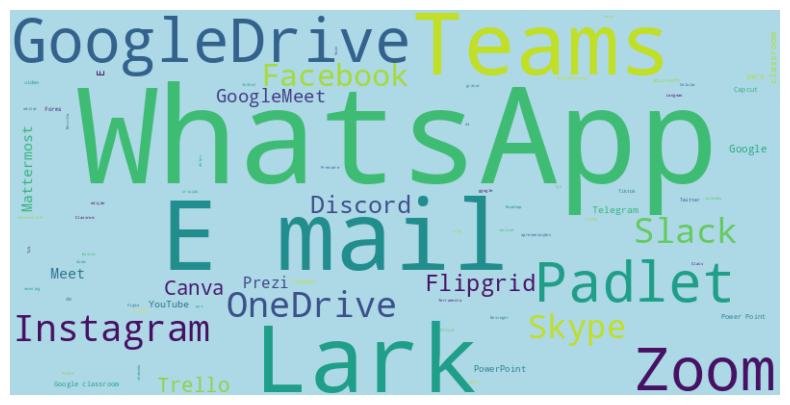

In [ ]:
#Ferramentas mais usadas
palavras = " a,- ".join(questNew['pergunta30']).replace(';', ' a,- ').replace('Google Drive (Docs, Sheets & Slides)', 'GoogleDrive').replace('Google meet','GoogleMeet').replace('Google Meet','GoogleMeet')

palavras_tokenizadas = word_tokenize(palavras)

wordcloud = WordCloud(width=800, height=400, background_color='lightblue').generate(" ".join(palavras_tokenizadas))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


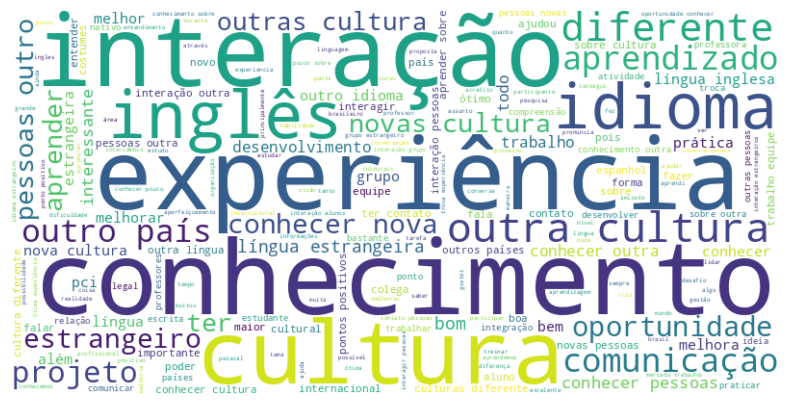

In [ ]:
#na sua opniao o que voce gostou no PCI
questNew['palavras_processadas'] = questNew['pergunta31'].apply(preprocess)

palavras = " ".join(questNew['palavras_processadas'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(palavras)

# Exibindo a nuvem de palavras usando Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Removendo os eixos
plt.show()


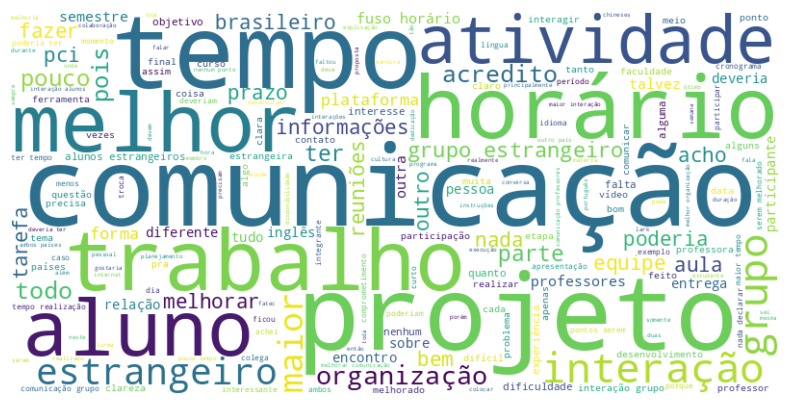

In [ ]:
#na sua opniao o que poderia ser melhor no PCI
questNew['palavras_processadas'] = questNew['pergunta32'].apply(preprocess)

palavras = " ".join(questNew['palavras_processadas'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(palavras)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


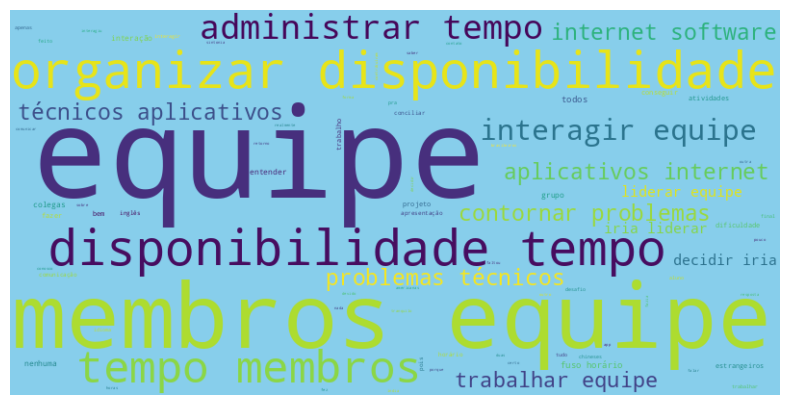

In [ ]:
#Pensando em equipes, oq foi desafiador
questNew['palavras_processadas'] = questNew['pergunta35'].apply(preprocess)

palavras = " a ".join(questNew['palavras_processadas']).replace(';', ' a ').replace('nan','')

wordcloud = WordCloud(width=800, height=400, background_color='skyblue').generate(palavras)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


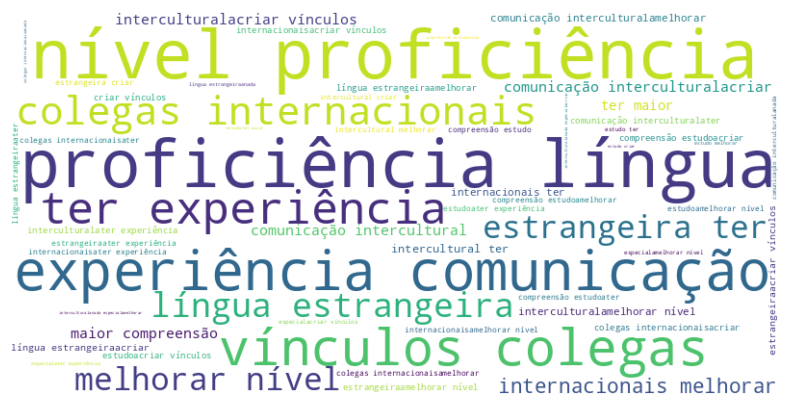

In [ ]:
#Em termos de expectativa, o que você esperava antes do início do PCI. Assinale as alternativas que correspondem à sua percepção.
questNew['palavras_processadas'] = questNew['pergunta36'].apply(preprocess)

palavras = "a".join(questNew['palavras_processadas']).replace(';', ' a ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(palavras)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from nltk.probability import FreqDist


[('a', 19197), ('r', 17545), (' ', 17147), ('i', 16614), ('e', 15603), ('n', 15223), ('c', 13815), ('o', 11036), ('l', 9534), ('t', 7674), ('u', 7225), ('s', 6113), ('g', 4023), ('í', 4014), ('m', 3663), ('p', 3340), ('ê', 2772), ('v', 2630), ('ã', 1823), ('h', 1394), ('f', 1394), ('ç', 1383), ('x', 1382), ('d', 573), ('b', 6), ('z', 4), ('q', 4), ('á', 2), ('j', 1), ('w', 1)]


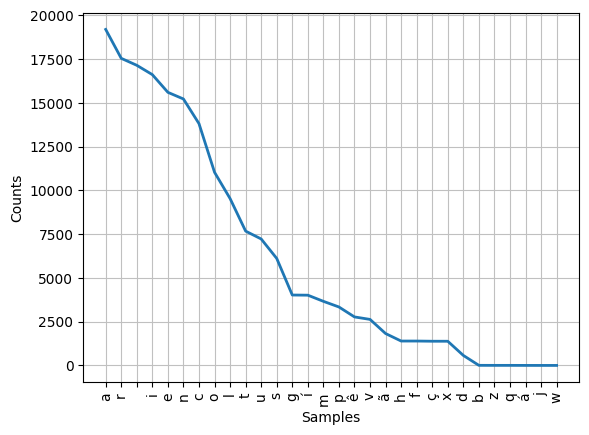

In [ ]:
fdist = FreqDist(palavras)
print(fdist.most_common(30))
fdist.plot(30);

In [ ]:
i=0
for coluna in questNew.columns:
    i= i+1
    print(' ----------------- ')
    print(' ')
    print('pergunta'+str(i))
    print(coluna)
    print(questNew[coluna].value_counts())


 ----------------- 
 
pergunta1
pergunta01
38     4
15     4
50     4
34     4
37     4
      ..
796    1
797    1
798    1
799    1
901    1
Name: pergunta01, Length: 901, dtype: int64
 ----------------- 
 
pergunta2
pergunta02
2023-05-20 11:59:34    2
2023-05-29 21:57:00    2
2023-06-06 22:40:27    2
2022-05-23 12:25:46    2
2023-06-01 09:35:22    2
                      ..
2022-05-25 21:40:48    1
2022-05-25 21:41:28    1
2022-05-25 21:40:52    1
2022-05-25 21:41:00    1
2023-07-14 08:22:01    1
Name: pergunta02, Length: 2310, dtype: int64
 ----------------- 
 
pergunta3
pergunta03
2022-05-25 17:05:48    2
2022-06-21 13:51:49    2
2021-12-16 17:11:09    1
2022-09-21 12:22:55    1
2022-09-21 12:28:20    1
                      ..
2022-05-25 21:52:21    1
2022-05-25 21:53:20    1
2022-05-25 21:54:30    1
2022-05-25 21:54:46    1
2023-07-14 08:26:24    1
Name: pergunta03, Length: 2317, dtype: int64
 ----------------- 
 
pergunta4
pergunta04
Fatec Ipiranga com Prof. Patricia Patrício e 

In [ ]:
colunas_int=[]
for colua in questNew.columns:
    if questNew[colua].dtype == 'int64':
        colunas_int.append(colua)

dfpca = questNew[colunas_int]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features = dfpca.columns[:-1]
x = dfpca.loc[:, features].values
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, questNew[['pergunta04']]], axis = 1)
finalDf.head()

principal component 1  principal component 2  \
0              96.489862              -0.821395   
1             108.487048              -0.545862   
2             177.488360              -1.797507   
3             136.486411              -1.491517   
4             109.486607              -1.687248   

                                          pergunta04  
0  Fatec Americana e FSU (EUA) com o prof. Carlos...  
1  Fatec Americana e FSU (EUA) com o prof. Carlos...  
2  Fatec Americana e FSU (EUA) com o prof. Carlos...  
3  Fatec Americana e FSU (EUA) com o prof. Carlos...  
4  Fatec Americana e FSU (EUA) com o prof. Carlos...

In [ ]:
mapeamento1 = {'Discordo totalmente': 1,'Discordo parcialmente': 2,'Não concordo nem discordo': 3,'Concordo parcialmente': 4,'Concordo totalmente': 5,'Não se aplica':0}

mapeamento2 = {'Ótima': 5,'Boa': 4,'Regular ou satisfatória': 3,'Ruim': 2,'Péssima': 1}

mapeamento3 = {'Excelente':4 ,'Bom':3,'Regular':2,'Poderia ser melhor':1}

mapeamento4= {'Básico': 2,'Pré-Intermediário': 3,'Intermediário': 4,'Avançado': 5,'Foi em português': 1,'Fluente': 6}

mapeamento5= {'Noite': 3,'Manhã': 1,'Tarde': 2}

mapeamento6= {'Uma - este é o meu primeiro PCI': 1,'Duas': 2,'Três': 3,'Três ou mais vezes':4, 'Quatro': 5, 'Cinco ou mais':6}

mapeamento7= {'Melhorou muito': 4,'Melhorou um pouco': 3,'Ficou igual': 2,'Foi em português':1 , 'Piorou um pouco': 2}

for coluna in df1013.columns:
    if all(df1013[coluna].isin(mapeamento1.keys())):
        df1013[coluna] = df1013[coluna].map(mapeamento1)
    elif all(df1013[coluna].isin(mapeamento2.keys())):
        df1013[coluna] = df1013[coluna].map(mapeamento2)
    elif all(df1013[coluna].isin(mapeamento3.keys())):
        df1013[coluna] = df1013[coluna].map(mapeamento3)
    elif all(df1013[coluna].isin(mapeamento4.keys())):
        df1013[coluna] = df1013[coluna].map(mapeamento4)
    elif all(df1013[coluna].isin(mapeamento5.keys())):
        df1013[coluna] = df1013[coluna].map(mapeamento5)
    elif all(df1013[coluna].isin(mapeamento6.keys())):
        df1013[coluna] = df1013[coluna].map(mapeamento6)
    elif all(df1013[coluna].isin(mapeamento7.keys())):
        df1013[coluna] = df1013[coluna].map(mapeamento7)

In [ ]:
df
colunas_int=[]
for colua in df1013.columns:
    if df1013[colua].dtype == 'int64':
        colunas_int.append(colua)

dfpca2 = df1013[colunas_int]



In [ ]:
dfpca2

pergunta01  pergunta05  pergunta06  pergunta07  pergunta09  pergunta10  \
0            1           3           2           5           6           6   
1            2           1           1           5           4           4   
2            3           1           1           5           4           4   
3            4           1           1           4           2           2   
4            5           1           1           5           2           2   
5            6           3           1           5           5           4   
6            7           1           1           5           3           3   
7            8           1           1           4           4           4   
8            9           3           2           5           2           2   
9           10           1           1           5           2           2   
10          11           1           1           5           2           2   
11          12           3           2           5           2           2   
12          13           3           2           5           2           2   
13          14           3           2           5           3           4   
14          15           3           2           5           5           5   
15          16           3           1           5           2           3   
16          17           3           2           5           2           2   
17          18           3           1           5           2           4   
18          19           3           2           5           2           3   
19          20           1           1           5           4           4   
20          21           3           1           5           2           4   
21          22           3           2           5           3           3   
22          23           3           1           5           2           2   
23          24           3           2           5           6           6   
24          25           3           2           5           4           4   
25          26           1           1           4           2           3   
26          27           1           1           5           3           4   
27          28           1           1           5           4           4   
28          29           3           1           5           4           4   
29          30           3           1           5           3           3   
30          31           3           5           5           3           4   
31          32           3           2           5           3           3   
32          33           3           2           5           3           3   
33          34           3           2           5           4           4   
34          35           3           2           5           2           2   
35          36           3           2           5           3           4   
36          37           3           2           5           2           2   
37          38           3           2           4           2           3   
38          39           1           2           5           4           3   
39          40           1           1           5           2           2   
40          41           1           1           5           3           4   
41          42           1           1           5           3           3   
42          43           1           1           5           4           4   
43          44           1           1           5           4           4   
44          45           1           1           5           4           4   
45          46           2           1           5           4           4   
46          47           1           1           5           2           2   
47          48           1           1           5           3           4   
48          49           1           1           5           4           5   
49          50           3           2           5           3           3   
50          51           3

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features = dfpca2.columns[:-1]
x = dfpca2.loc[:, features].values
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df1013[['pergunta04']]], axis = 1)
finalDf.head()

principal component 1  principal component 2  \
0             -25.519649               6.076698   
1             -24.498010               1.924715   
2             -23.527831               3.565006   
3             -22.542394              -4.044171   
4             -21.483403              -3.083011   

                                          pergunta04  
0  Fatec Garça e Setsunan University do Japão com...  
1  Fatec Garça e Setsunan University do Japão com...  
2  Fatec Garça e Setsunan University do Japão com...  
3  Fatec Garça e Setsunan University do Japão com...  
4  Fatec Garça e Setsunan University do Japão com...

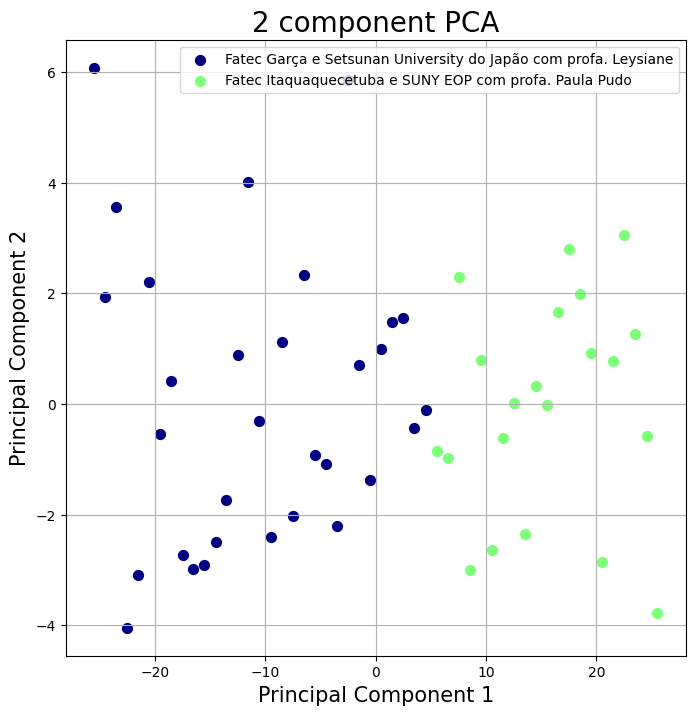

In [ ]:
import matplotlib.pyplot as plt

color_mapping = {
    value: plt.cm.jet(i/len(df1013['pergunta04'].unique()))
    for i, value in enumerate(df1013['pergunta04'].unique())
}

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

for value in df1013['pergunta04'].unique():
    indicesToKeep = finalDf['pergunta04'] == value
    ax.scatter(
        finalDf.loc[indicesToKeep, 'principal component 1'],
        finalDf.loc[indicesToKeep, 'principal component 2'],
        c=[color_mapping[value]],
        s=50,
        label=str(value)
    )
ax.legend()
ax.grid()
plt.show()


#**Algumas observações importantes e perguntas que devem ser respondidas**


**Quais são maneiras (métricas) para julgar um convênio (PCI) como bem sucedido?**

  - Veja nas planilhas de **Professores**; observe como **bem sucedidos** os convênios que se *repetem*.


**Como perceber uma avaliação positiva por parte do aluno?**

  - Observe a resposta à pergunta *Fazer o PCI me motivou a continuar no curso (redução da evasão)?*
  - Idem para a pergunta sobre a *Melhoria na competência linguística*
  - Idem para a pergunta sobre aumento das chances no mercado de trabalho (*empregabilidade*)


**Busque responder às seguintes perguntas:**

  - Clareza nos objetivos está relacionada com percepção positiva por parte do aluno?

  - Alunos que participaram de mais de um PCI percebem mais melhoria na competência linguística?
  
  - Alunos que participaram de mais de um PCI ficaram mais motivados a permanecer no curso (*redução da evasão*)?
  
  - Alunos que participaram de mais de um PCI acham que este convênio aumenta chances no mercado de trabalho (*empregabilidade*)?


In [ ]:
questNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pergunta01            2319 non-null   int64         
 1   pergunta02            2319 non-null   datetime64[ns]
 2   pergunta03            2319 non-null   datetime64[ns]
 3   pergunta04            2319 non-null   object        
 4   pergunta05            2319 non-null   int64         
 5   pergunta06            2319 non-null   int64         
 6   pergunta07            2319 non-null   int64         
 7   pergunta08            2319 non-null   object        
 8   pergunta09            2319 non-null   int64         
 9   pergunta10            2319 non-null   int64         
 10  pergunta11            2319 non-null   int64         
 11  pergunta12            2319 non-null   int64         
 12  pergunta13            2319 non-null   int64         
 13  pergunta14        

O que falta:

- Responder Perguntas acima

Pergunta 1:  "Em termos de PCI, esta experiência foi a sua"
- Ter mais gráficos e correlações




In [ ]:
df121.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 47 columns):
 #   Column                                                                                                                                                                                                   Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                   --------------  -----         
 0   ID                                                                                                                                                                                                       47 non-null     int64         
 1   Hora de início                                                                                                                                                                       

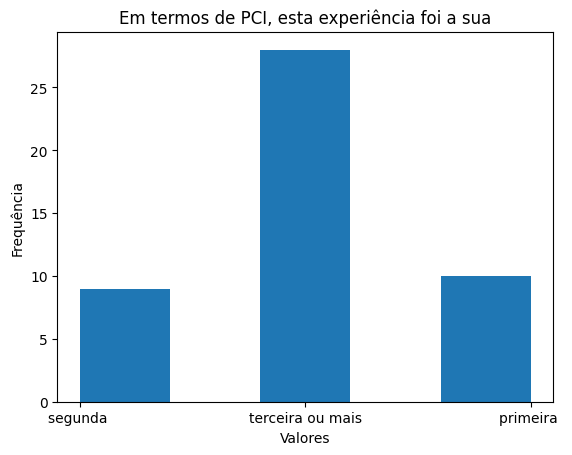

In [ ]:
# Pergunta 1
# Veja nas planilhas de **Professores**; observe como **bem sucedidos** os convênios que se *repetem*.
# Importar a biblioteca necessária, se ainda não foi feito
import matplotlib.pyplot as plt

colunas_selecionadas = ['Em termos de PCI, esta experiência foi a sua']

for i, coluna in enumerate(colunas_selecionadas):
    plt.hist(df121[coluna], bins=5)
    plt.xlabel('Valores')
    plt.ylabel('Frequência')

    if coluna == 'Em termos de PCI, esta experiência foi a sua':
        plt.title("Em termos de PCI, esta experiência foi a sua")

    plt.show()

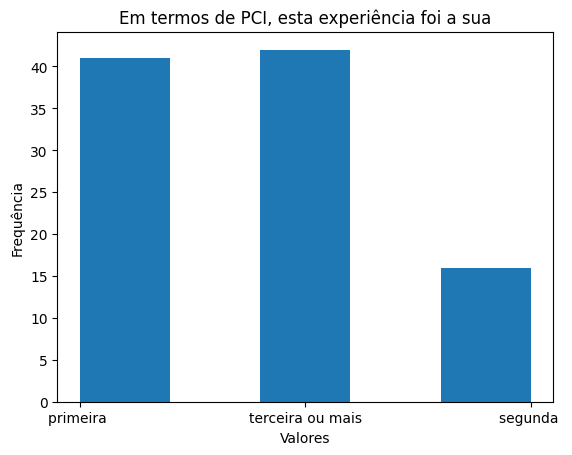

In [ ]:
# Pergunta 1
# Veja nas planilhas de **Professores**; observe como **bem sucedidos** os convênios que se *repetem*.
# Importar a biblioteca necessária, se ainda não foi feito
import matplotlib.pyplot as plt

colunas_selecionadas = ['Em termos de PCI, esta experiência foi a sua']

for i, coluna in enumerate(colunas_selecionadas):
    plt.hist(df120[coluna], bins=5)
    plt.xlabel('Valores')
    plt.ylabel('Frequência')

    if coluna == 'Em termos de PCI, esta experiência foi a sua':
        plt.title("Em termos de PCI, esta experiência foi a sua")

    plt.show()

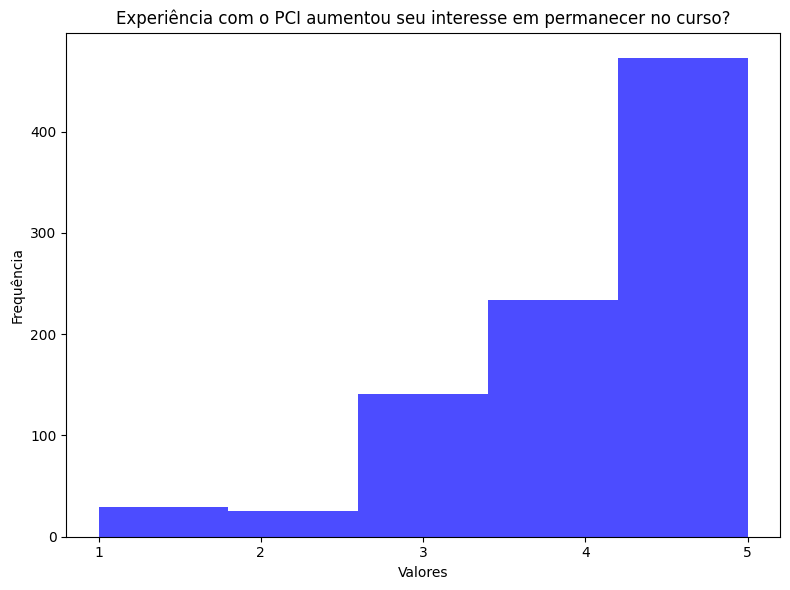

In [ ]:

colunas_selecionadas = ['pergunta15']
cores = ['blue']

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

for i, coluna in enumerate(colunas_selecionadas):
    axs.hist(df2[coluna], bins=5, color=cores[i], alpha=0.7)  # Adicionei o parâmetro 'alpha' para transparência
    axs.set_xlabel('Valores')
    axs.set_ylabel('Frequência')

    if coluna == 'pergunta15':
        axs.set_title("Experiência com o PCI aumentou seu interesse em permanecer no curso?")

    axs.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    axs.set_ylim(0, max(axs.get_ylim()) + 1)  # Ajuste para garantir que a barra mais alta seja totalmente visível

plt.tight_layout()
plt.show()

# Resposta: Em geral, é possível perceber que a experiência no PCI aumentou o interesse em continuar no curso

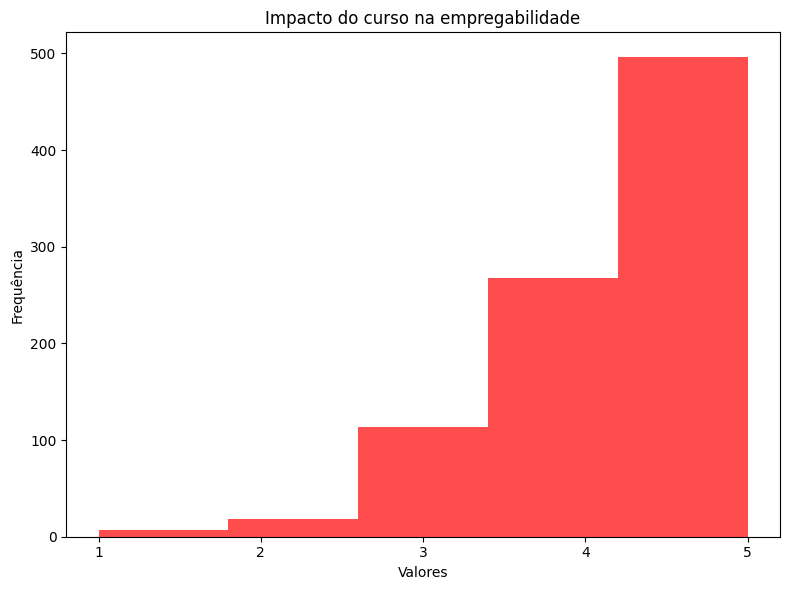

In [ ]:
import matplotlib.pyplot as plt

# Certifique-se de substituir 'df2' pelo nome real do seu DataFrame

colunas_selecionadas = ['pergunta40']
cores = ['red']

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

for i, coluna in enumerate(colunas_selecionadas):
    axs.hist(df2[coluna], bins=5, color=cores[i], alpha=0.7)
    axs.set_xlabel('Valores')
    axs.set_ylabel('Frequência')

    if coluna == 'pergunta40':
        axs.set_title("Impacto do curso na empregabilidade")

    axs.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    axs.set_ylim(0, max(axs.get_ylim()) + 1)

plt.tight_layout()
plt.show()


# Resposta: Em geral, é possível perceber que a experiência no PCI aumentou o impacto do curso na empregabilidade

In [ ]:
#Arquivos dos docentes
df120= pd.read_excel('/content/Anonimizados/1s2022 Docentes -Pesquisa de Percepção sobre o Projeto Colaborativo Internacional PCI_CESU (1-99).xlsx')
df121= pd.read_excel('/content/Anonimizados/2s2022 Docentes -Pesquisa de Percepção sobre o Projeto Colaborativo Internacional PCI_CESU (1-47).xlsx')

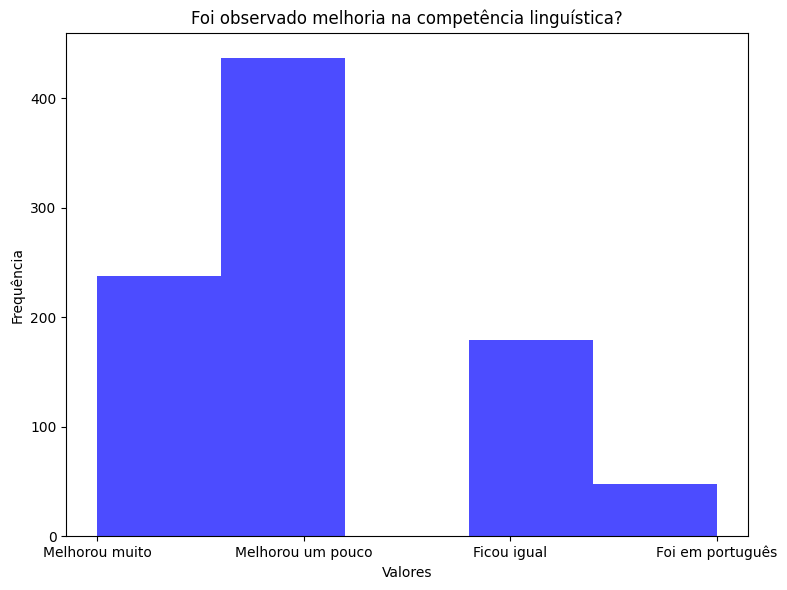

In [ ]:
import matplotlib.pyplot as plt

colunas_selecionadas = ['pergunta14']
cores = ['blue']

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

for i, coluna in enumerate(colunas_selecionadas):
    axs.hist(df1[coluna], bins=5, color=cores[i], alpha=0.7)
    axs.set_xlabel('Valores')
    axs.set_ylabel('Frequência')

    if coluna == 'pergunta14':
        axs.set_title("Foi observado melhoria na competência linguística?")

    axs.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    axs.set_ylim(0, max(axs.get_ylim()) + 1)  # Ajuste para garantir que a barra mais alta seja totalmente visível

plt.tight_layout()
plt.show()


In [ ]:
# testes
df10 = pd.read_excel('/content/Anonimizados/Pesquisa de Percepção sobre o PCI – Cesu Discentes - 1s2022.xlsx')
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 43 columns):
 #   Column                                                                                                                                                          Non-Null Count  Dtype         
---  ------                                                                                                                                                          --------------  -----         
 0   ID                                                                                                                                                              902 non-null    int64         
 1   Start time                                                                                                                                                      902 non-null    datetime64[ns]
 2   Completion time                                                                                           

In [ ]:
coluna_clareza_objetivos = 'pergunta20'
coluna_percepcao_positiva = 'pergunta07'

dfpca2['pergunta20_categorizada'] = pd.Categorical(dfpca2[coluna_clareza_objetivos], categories=dfpca2[coluna_clareza_objetivos].unique(), ordered=True)

dfpca2['pergunta07_categorizada'] = pd.Categorical(dfpca2[coluna_percepcao_positiva], categories=dfpca2[coluna_percepcao_positiva].unique(), ordered=True)

print(dfpca2[['pergunta20_categorizada', 'pergunta07_categorizada']])

   pergunta20_categorizada pergunta07_categorizada
0                        5                       5
1                        5                       5
2                        5                       5
3                        4                       4
4                        4                       5
5                        4                       5
6                        5                       5
7                        5                       4
8                        4                       5
9                        4                       5
10                       5                       5
11                       5                       5
12                       4                       5
13                       5                       5
14                       5                       5
15                       5                       5
16                       5                       5
17                       5                       5
18                       5     

<ipython-input-202-cc6f78b205cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpca2['pergunta20_categorizada'] = pd.Categorical(dfpca2[coluna_clareza_objetivos], categories=dfpca2[coluna_clareza_objetivos].unique(), ordered=True)
<ipython-input-202-cc6f78b205cd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpca2['pergunta07_categorizada'] = pd.Categorical(dfpca2[coluna_percepcao_positiva], categories=dfpca2[coluna_percepcao_positiva].unique(), ordered=True)


In [ ]:
# Clareza nos objetivos está relacionada com percepção positiva por parte do aluno?
from scipy.stats import kendalltau

coluna_clareza_categorizada = 'pergunta20_categorizada'
coluna_percepcao_categorizada = 'pergunta07_categorizada'

corr_clareza_percepcao, _ = kendalltau(dfpca2[coluna_clareza_categorizada], dfpca2[coluna_percepcao_categorizada])

print(f"Correlação entre clareza nos objetivos e percepção positiva: {corr_clareza_percepcao}")

Correlação entre clareza nos objetivos e percepção positiva: 0.18446619684315546


In [ ]:
coluna_clareza_objetivos = 'pergunta06'
coluna_percepcao_positiva = 'pergunta14'

dfpca2['pergunta06_categorizada'] = pd.Categorical(dfpca2[coluna_clareza_objetivos], categories=dfpca2[coluna_clareza_objetivos].unique(), ordered=True)

dfpca2['pergunta14_categorizada'] = pd.Categorical(dfpca2[coluna_percepcao_positiva], categories=dfpca2[coluna_percepcao_positiva].unique(), ordered=True)

print(dfpca2[['pergunta06_categorizada', 'pergunta14_categorizada']])

   pergunta06_categorizada pergunta14_categorizada
0                        2                       4
1                        1                       4
2                        1                       3
3                        1                       3
4                        1                       3
5                        1                       3
6                        1                       4
7                        1                       3
8                        2                       3
9                        1                       3
10                       1                       3
11                       2                       3
12                       2                       2
13                       2                       4
14                       2                       4
15                       1                       3
16                       2                       4
17                       1                       4
18                       2     

<ipython-input-204-2e6fa5d25e73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpca2['pergunta06_categorizada'] = pd.Categorical(dfpca2[coluna_clareza_objetivos], categories=dfpca2[coluna_clareza_objetivos].unique(), ordered=True)
<ipython-input-204-2e6fa5d25e73>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpca2['pergunta14_categorizada'] = pd.Categorical(dfpca2[coluna_percepcao_positiva], categories=dfpca2[coluna_percepcao_positiva].unique(), ordered=True)


In [ ]:
# Alunos que participaram de mais de um PCI percebem mais melhoria na competência linguística?
coluna_clareza_categorizada = 'pergunta06_categorizada'
coluna_percepcao_categorizada = 'pergunta14_categorizada'

corr_clareza_percepcao, _ = kendalltau(dfpca2[coluna_clareza_categorizada], dfpca2[coluna_percepcao_categorizada])

print(f"Correlação entre clareza nos objetivos e percepção positiva: {corr_clareza_percepcao}")

Correlação entre clareza nos objetivos e percepção positiva: -0.07356030739299646


In [ ]:
coluna_clareza_objetivos = 'pergunta06'
coluna_percepcao_positiva = 'pergunta15'

dfpca2['pergunta06_categorizada'] = pd.Categorical(dfpca2[coluna_clareza_objetivos], categories=dfpca2[coluna_clareza_objetivos].unique(), ordered=True)

dfpca2['pergunta15_categorizada'] = pd.Categorical(dfpca2[coluna_percepcao_positiva], categories=dfpca2[coluna_percepcao_positiva].unique(), ordered=True)

print(dfpca2[['pergunta06_categorizada', 'pergunta15_categorizada']])

   pergunta06_categorizada pergunta15_categorizada
0                        2                       5
1                        1                       5
2                        1                       5
3                        1                       3
4                        1                       4
5                        1                       4
6                        1                       5
7                        1                       5
8                        2                       5
9                        1                       4
10                       1                       4
11                       2                       5
12                       2                       5
13                       2                       5
14                       2                       5
15                       1                       5
16                       2                       5
17                       1                       5
18                       2     

<ipython-input-206-51ad2878c979>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpca2['pergunta06_categorizada'] = pd.Categorical(dfpca2[coluna_clareza_objetivos], categories=dfpca2[coluna_clareza_objetivos].unique(), ordered=True)
<ipython-input-206-51ad2878c979>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpca2['pergunta15_categorizada'] = pd.Categorical(dfpca2[coluna_percepcao_positiva], categories=dfpca2[coluna_percepcao_positiva].unique(), ordered=True)


In [ ]:
# Alunos que participaram de mais de um PCI ficaram mais motivados a permanecer no curso (redução da evasão)?
coluna_clareza_categorizada = 'pergunta06_categorizada'
coluna_percepcao_categorizada = 'pergunta15_categorizada'

corr_clareza_percepcao, _ = kendalltau(dfpca2[coluna_clareza_categorizada], dfpca2[coluna_percepcao_categorizada])

print(f"Correlação entre clareza nos objetivos e percepção positiva: {corr_clareza_percepcao}")

Correlação entre clareza nos objetivos e percepção positiva: -0.04931962459697606


In [ ]:
coluna_clareza_objetivos = 'pergunta11'
coluna_percepcao_positiva = 'pergunta12'

dfpca2['pergunta11_categorizada'] = pd.Categorical(dfpca2[coluna_clareza_objetivos], categories=dfpca2[coluna_clareza_objetivos].unique(), ordered=True)

dfpca2['pergunta12_categorizada'] = pd.Categorical(dfpca2[coluna_percepcao_positiva], categories=dfpca2[coluna_percepcao_positiva].unique(), ordered=True)

print(dfpca2[['pergunta11_categorizada', 'pergunta12_categorizada']])

   pergunta11_categorizada pergunta12_categorizada
0                        6                       6
1                        4                       4
2                        4                       6
3                        2                       2
4                        3                       2
5                        4                       5
6                        4                       4
7                        4                       4
8                        2                       2
9                        2                       2
10                       2                       2
11                       2                       2
12                       3                       3
13                       4                       3
14                       5                       5
15                       4                       3
16                       2                       2
17                       4                       4
18                       3     

<ipython-input-208-b7303b726fe5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpca2['pergunta11_categorizada'] = pd.Categorical(dfpca2[coluna_clareza_objetivos], categories=dfpca2[coluna_clareza_objetivos].unique(), ordered=True)
<ipython-input-208-b7303b726fe5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpca2['pergunta12_categorizada'] = pd.Categorical(dfpca2[coluna_percepcao_positiva], categories=dfpca2[coluna_percepcao_positiva].unique(), ordered=True)


In [ ]:
#Correlação entre leitura e compreensão oral
coluna_clareza_categorizada = 'pergunta11_categorizada'
coluna_percepcao_categorizada = 'pergunta12_categorizada'

corr_clareza_percepcao, _ = kendalltau(dfpca2[coluna_clareza_categorizada], dfpca2[coluna_percepcao_categorizada])

print(f"Correlação entre clareza nos objetivos e percepção positiva: {corr_clareza_percepcao}")

Correlação entre clareza nos objetivos e percepção positiva: 0.6982019548041268


In [ ]:
coluna_clareza_objetivos = 'pergunta06'
coluna_percepcao_positiva = 'pergunta38'

dfpca2['pergunta06_categorizada'] = pd.Categorical(dfpca2[coluna_clareza_objetivos], categories=dfpca2[coluna_clareza_objetivos].unique(), ordered=True)

dfpca2['pergunta38_categorizada'] = pd.Categorical(dfpca2[coluna_percepcao_positiva], categories=dfpca2[coluna_percepcao_positiva].unique(), ordered=True)

print(dfpca2[['pergunta06_categorizada', 'pergunta38_categorizada']])

   pergunta06_categorizada pergunta38_categorizada
0                        2                       5
1                        1                       5
2                        1                       5
3                        1                       4
4                        1                       5
5                        1                       5
6                        1                       5
7                        1                       5
8                        2                       5
9                        1                       5
10                       1                       5
11                       2                       5
12                       2                       5
13                       2                       5
14                       2                       5
15                       1                       5
16                       2                       5
17                       1                       5
18                       2     

<ipython-input-210-db59373950eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpca2['pergunta06_categorizada'] = pd.Categorical(dfpca2[coluna_clareza_objetivos], categories=dfpca2[coluna_clareza_objetivos].unique(), ordered=True)
<ipython-input-210-db59373950eb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpca2['pergunta38_categorizada'] = pd.Categorical(dfpca2[coluna_percepcao_positiva], categories=dfpca2[coluna_percepcao_positiva].unique(), ordered=True)


In [ ]:
# Alunos que participaram de mais de um PCI acham que este convênio aumenta chances no mercado de trabalho (empregabilidade)?
coluna_clareza_categorizada = 'pergunta06_categorizada'
coluna_percepcao_categorizada = 'pergunta38_categorizada'

corr_clareza_percepcao, _ = kendalltau(dfpca2[coluna_clareza_categorizada], dfpca2[coluna_percepcao_categorizada])

print(f"Correlação entre clareza nos objetivos e percepção positiva: {corr_clareza_percepcao}")

Correlação entre clareza nos objetivos e percepção positiva: -0.37863293177147667


# Teste Arvore de Previsão



In [ ]:
## Copiando base para Arvore de Decisão
PCI_bem_sucedido = questNew.copy()

In [ ]:
## Conferindo copia da base para Arvore de Decisão
i=0
for coluna in PCI_bem_sucedido.columns:
    i= i+1
    print(' ----------------- ')
    print(' ')
    print('pergunta'+str(i))
    print(coluna)
    print(questNew[coluna].value_counts())
    if i == 40:
      questNew.drop(coluna, axis=1, inplace= True)
    if i == 39:
      questNew.drop(coluna, axis=1, inplace= True)

 ----------------- 
 
pergunta1
pergunta01
38     4
15     4
50     4
34     4
37     4
      ..
796    1
797    1
798    1
799    1
901    1
Name: pergunta01, Length: 901, dtype: int64
 ----------------- 
 
pergunta2
pergunta02
2023-05-20 11:59:34    2
2023-05-29 21:57:00    2
2023-06-06 22:40:27    2
2022-05-23 12:25:46    2
2023-06-01 09:35:22    2
                      ..
2022-05-25 21:40:48    1
2022-05-25 21:41:28    1
2022-05-25 21:40:52    1
2022-05-25 21:41:00    1
2023-07-14 08:22:01    1
Name: pergunta02, Length: 2310, dtype: int64
 ----------------- 
 
pergunta3
pergunta03
2022-05-25 17:05:48    2
2022-06-21 13:51:49    2
2021-12-16 17:11:09    1
2022-09-21 12:22:55    1
2022-09-21 12:28:20    1
                      ..
2022-05-25 21:52:21    1
2022-05-25 21:53:20    1
2022-05-25 21:54:30    1
2022-05-25 21:54:46    1
2023-07-14 08:26:24    1
Name: pergunta03, Length: 2317, dtype: int64
 ----------------- 
 
pergunta4
pergunta04
Fatec Ipiranga com Prof. Patricia Patrício e 

In [ ]:
## Tratando base para Arvore de Decisão
PCI_bem_sucedido.drop(['pergunta01'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta02'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta03'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta04'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta05'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta08'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta09'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta10'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta11'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta12'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta13'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta15'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta16'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta17'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta19'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta21'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta22'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta23'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta24'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta25'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta26'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta27'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta28'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta29'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta30'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta31'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta32'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta33'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta34'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta35'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta36'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta37'], axis =1, inplace = True)
PCI_bem_sucedido.drop(['pergunta38'], axis =1, inplace = True)

In [ ]:
## Criando mapeamento "reverso"
mapeamento = {1: "Uma vez", 2: "Duas vezes", 3: "Três vezes", 4: "Três ou mais vezes", 5: "Quatro vezes", 6: "Cinco ou mais vezes"}

PCI_bem_sucedido['pergunta06'] = PCI_bem_sucedido['pergunta06'].map(mapeamento)

In [ ]:
## Criando Tabela para Arvore de Decisão
PCI_bem_sucedido

pergunta06  pergunta07  pergunta14  pergunta18  pergunta20  \
0        Uma vez           4           2           4           4   
1        Uma vez           5           3           5           5   
2        Uma vez           5           3           5           5   
3        Uma vez           5           3           5           5   
4        Uma vez           5           4           5           5   
...          ...         ...         ...         ...         ...   
2314     Uma vez           5           2           4           4   
2315  Duas vezes           5           3           5           5   
2316     Uma vez           4           1           4           4   
2317     Uma vez           5           1           4           5   
2318     Uma vez           5           4           5           5   

                                   palavras_processadas  
0     melhorar nível proficiência língua estrangeira...  
1             ter experiência comunicação intercultural  
2             ter experiência comunicação intercultural  
3     criar vínculos colegas internacionais melhorar...  
4        melhorar nível proficiência língua estrangeira  
...                                                 ...  
2314  ter experiência comunicação intercultural ter ...  
2315  criar vínculos colegas internacionais melhorar...  
2316  criar vínculos colegas internacionais ter expe...  
2317  criar vínculos colegas internacionais ter expe...  
2318  melhorar nível proficiência língua estrangeira...  

[2319 rows x 6 columns]

In [ ]:
X_PCI_bem_sucedido = PCI_bem_sucedido.iloc[:, 1:5]
X_PCI_bem_sucedido

pergunta07  pergunta14  pergunta18  pergunta20
0              4           2           4           4
1              5           3           5           5
2              5           3           5           5
3              5           3           5           5
4              5           4           5           5
...          ...         ...         ...         ...
2314           5           2           4           4
2315           5           3           5           5
2316           4           1           4           4
2317           5           1           4           5
2318           5           4           5           5

[2319 rows x 4 columns]

In [ ]:
Y_PCI_bem_sucedido = PCI_bem_sucedido.iloc[:, 0].values
Y_PCI_bem_sucedido

array(['Uma vez', 'Uma vez', 'Uma vez', ..., 'Uma vez', 'Uma vez',
       'Uma vez'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_pergunta07 = LabelEncoder()
label_encoder_pergunta14 = LabelEncoder()
label_encoder_pergunta15 = LabelEncoder()
label_encoder_pergunta18 = LabelEncoder()
label_encoder_pergunta20 = LabelEncoder()

In [ ]:
X_PCI_bem_sucedido

pergunta07  pergunta14  pergunta18  pergunta20
0              4           2           4           4
1              5           3           5           5
2              5           3           5           5
3              5           3           5           5
4              5           4           5           5
...          ...         ...         ...         ...
2314           5           2           4           4
2315           5           3           5           5
2316           4           1           4           4
2317           5           1           4           5
2318           5           4           5           5

[2319 rows x 4 columns]

In [ ]:
import pickle
with open('PCI_bem_sucedido.pkl', 'wb') as f:
          pickle.dump([X_PCI_bem_sucedido, Y_PCI_bem_sucedido], f)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore_PCI_bem_sucedido = DecisionTreeClassifier(criterion='entropy')
arvore_PCI_bem_sucedido.fit(X_PCI_bem_sucedido, Y_PCI_bem_sucedido)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
arvore_PCI_bem_sucedido.feature_importances_

array([0.2577926 , 0.18980628, 0.22440179, 0.32799933])

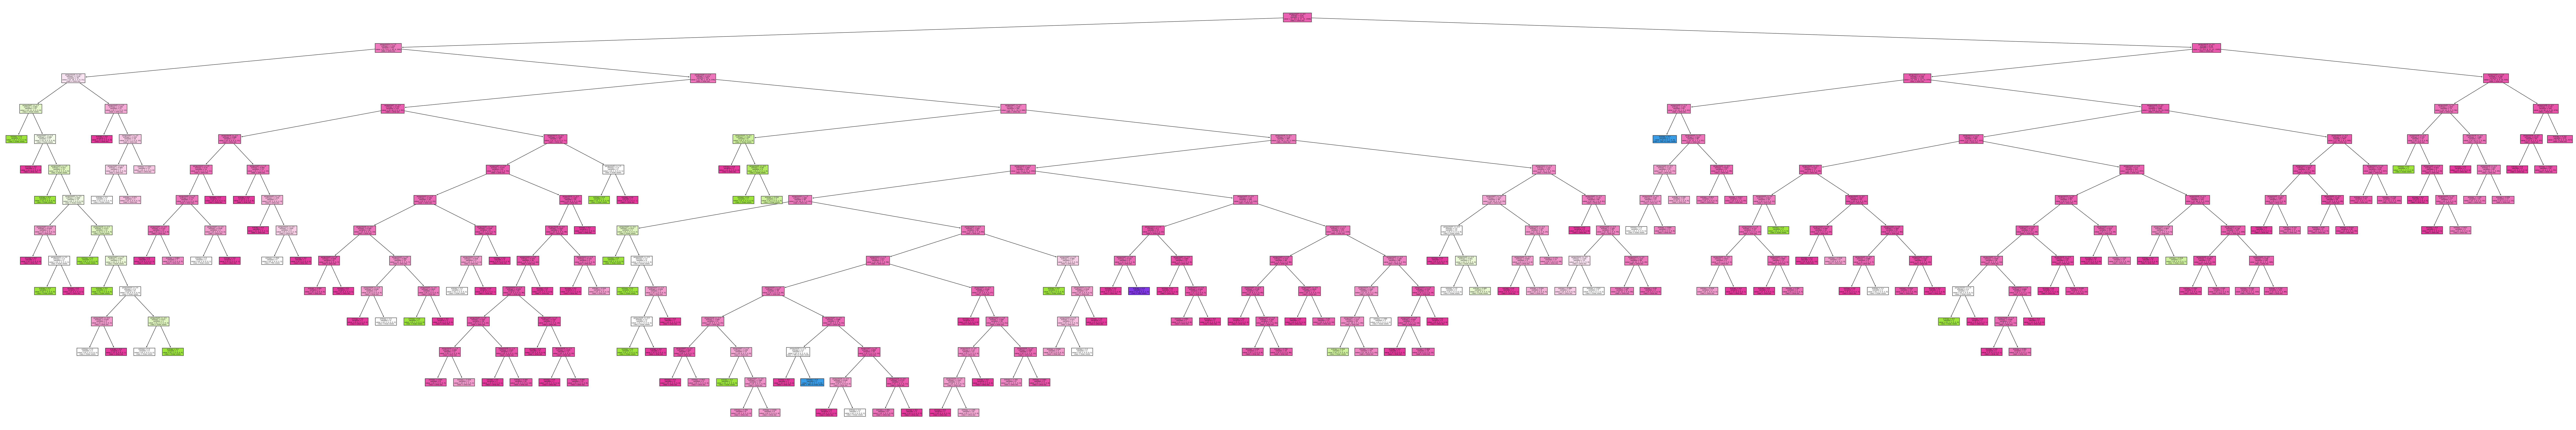

In [ ]:
from sklearn import tree
previsores = ['pergunta07', 'pergunta14', 'pergunta18', 'pergunta20']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(150,25))
tree.plot_tree(arvore_PCI_bem_sucedido, feature_names=previsores, class_names = arvore_PCI_bem_sucedido.classes_, filled=True);